In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline

def elbow_method(df):
    errors = []
    for i in range(5):
        kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
        kmeans.fit_predict(df.as_matrix()) 
        error = kmeans.inertia_
        
        errors.append(error)
    
    # Plot our errors
    plt.figure(0)
    plt.title('Error by Number of Clusters')
    plt.ylabel('Error')
    plt.xlabel('Num Clusters')
    plt.plot(errors)

In [2]:
origin_df = pd.read_csv('datasets/FIO_data.csv')

df = pd.DataFrame()
# Now, we have to turn our categorical variables into dummy numeric variables:
df_sex = pd.get_dummies(origin_df['SEX'], 'sex')
df = pd.concat([df, df_sex], axis=1)

df_race = pd.get_dummies(origin_df['RACE_DESC'], 'race')
df = pd.concat([df, df_race], axis=1)

date = origin_df['FIO_DATE_CORRECTED']
age = origin_df["AGE_AT_FIO_CORRECTED"]

#bin the ages, then make dummies
ages = []
for index, row in age.iteritems():
    binned_ages = ["13-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-100"]
    a = int(row)
    if a >= 13 and a <= 19:
        ages.append("13-19")
    elif a >= 20 and a <= 29:
        ages.append("20-29")
    elif a >= 30 and a <= 39:
        ages.append("30-39")
    elif a >= 40 and a <= 49:
        ages.append("40-49")
    elif a >= 50 and a <= 59:
        ages.append("50-59")
    elif a >= 60 and a <= 69:
        ages.append("60-69")
    elif a >= 70 and a <= 100:
        ages.append("70-100")
    else:
        ages.append("other/unknown")


ages = pd.get_dummies(pd.DataFrame(ages), "age")
df = pd.concat([df, ages], axis=1)

# Discretize each date code into its day of the month, and month of the year
day_of_month = []
month_of_year = []
for index, row in date.iteritems():
    month = row[0:2]
    day = row[3:5]
    
    day_of_month.append(day)
    month_of_year.append(month)


# Find and replace 'bad addresses' with 0
for index, row in (origin_df['LAT'].iteritems()):
    if 'bad address' in row:
        origin_df['LAT'][index] = 0
        origin_df['LONG'][index] = 0

# Turn all lat/long data into floating point numbers
new_lat = [float(x) for x in origin_df['LAT']]
new_long = [float(x) for x in origin_df['LONG']]

#should consider clustering with only lat/long
df['DAY_OF_MONTH'] = pd.Series(day_of_month, index=df.index)
df['MONTH_OF_YEAR'] = pd.Series(month_of_year, index=df.index)
origin_df['LAT'] = pd.Series(new_lat, index=df.index)
origin_df['LONG'] = pd.Series(new_long, index=df.index)
display(df)



//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,sex_FEMALE,sex_MALE,sex_UNKNOWN,race_A(Asian or Pacific Islander),race_B(Black),race_H(Hispanic),race_I(American Indian or Alaskan Native),race_M(Middle Eastern or East Indian),race_NO DATA ENTERED,race_UNKNOWN,...,age_13-19,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-100,age_other/unknown,DAY_OF_MONTH,MONTH_OF_YEAR
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10,12
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24,05
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04,06
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21,06
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,02,12
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,09,06
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,03,08
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31,08
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,31,08
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31,08


In [175]:
import sklearn.cluster as cluster
dbscan = cluster.DBSCAN(eps=1.2)
dbscan.fit(df.as_matrix())
pred = dbscan.labels_.astype(np.int)
print(pred)
print("Number of DBSCAN clusters: ", max(pred))

[ 0  1  2 ...,  3 11  3]
Number of DBSCAN clusters:  239


Core points:  [     0      1      2 ..., 152227 152228 152229]
Number of core points:  148040


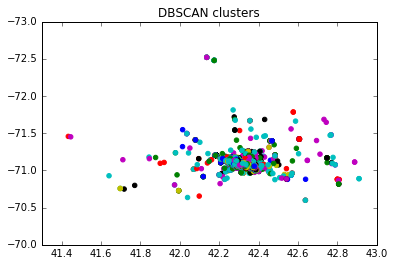

In [176]:
core_points = dbscan.core_sample_indices_
print("Core points: ", core_points)
print("Number of core points: ", len(core_points))
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(np.array(origin_df["LAT"]), np.array(origin_df["LONG"]), color=colors[pred].tolist())
plt.title("DBSCAN clusters")
plt.xlim(41.3, 43)
plt.ylim(-70, -73)
plt.show()

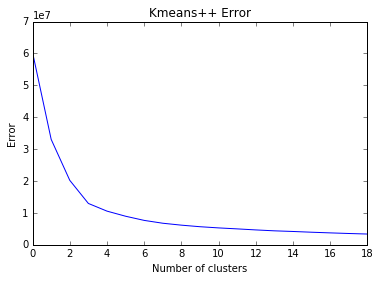

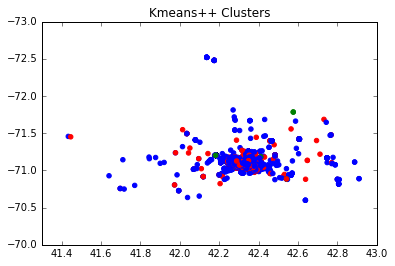

In [177]:
def evaluate_kmeans(data, max_clusters):
    error = []
    for k in range(1,max_clusters):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(data)
        error += [kmeans.inertia_]

    plt.plot(range(len(error)),error)
    plt.title("Kmeans++ Error")
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    plt.show()

evaluate_kmeans(df.as_matrix(), 20)
k = 3
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit_predict(df.as_matrix()) 
labels = kmeans.labels_
plt.scatter(origin_df['LAT'], origin_df['LONG'], color=colors[labels].tolist())
plt.title("Kmeans++ Clusters")
plt.xlim(41.3, 43)
plt.ylim(-70, -73)
plt.show()



DBSCAN cluster sizes: 
[    4     5     5     5     5     5     5     5     5     5     5     5
     5     5     5     5     5     5     5     5     5     5     5     5
     5     5     5     5     5     5     5     5     5     5     5     5
     5     5     5     5     5     5     5     5     5     5     5     5
     5     5     5     5     5     5     5     5     5     5     5     5
     5     5     5     5     5     5     5     6     6     6     6     6
     6     6     6     6     6     6     6     6     6     6     6     6
     6     6     6     6     6     6     6     6     6     6     6     6
     6     6     7     7     7     7     7     7     7     7     7     7
     7     7     7     7     7     7     7     7     7     7     7     7
     8     8     8     8     8     8     8     8     8     8     8     8
     8     8     8     8     9     9     9     9     9     9     9     9
    10    10    10    10    10    10    10    10    11    11    11    11
    11    11    11    12   

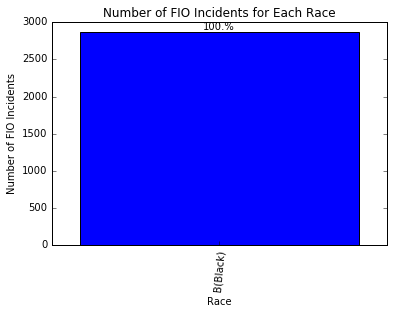

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [457, 24, 976, 229, 105, 256, 576, 52, 25, 128, 27]


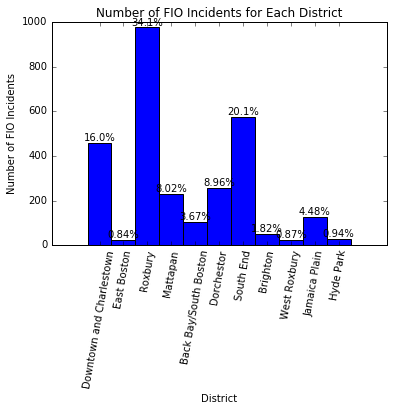

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 2866, 0, 0]


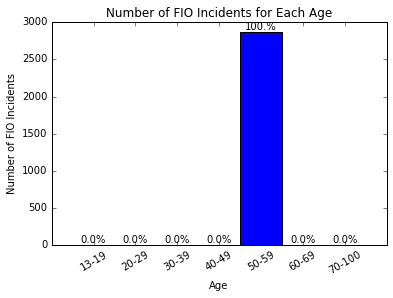

Sex:  ['MALE']
Counts based on Sex:  [2866]


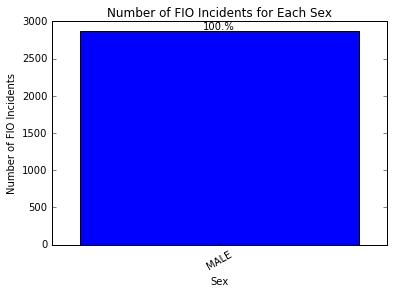

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [381, 486, 486, 440, 440, 349, 284]


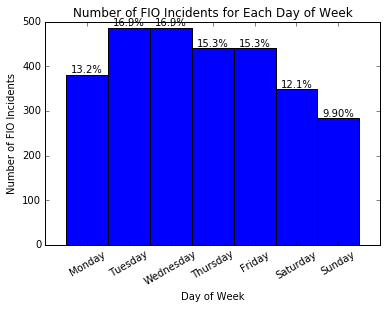


Plots for Cluster 1 from Kmeans++...

There are 9346 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [6859]


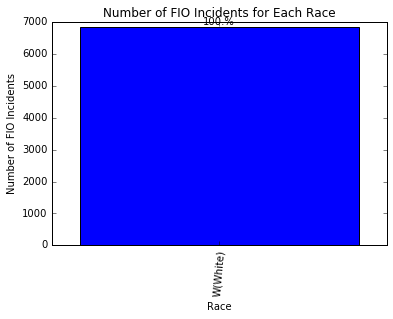

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [1785, 415, 852, 387, 1051, 604, 815, 268, 256, 248, 156]


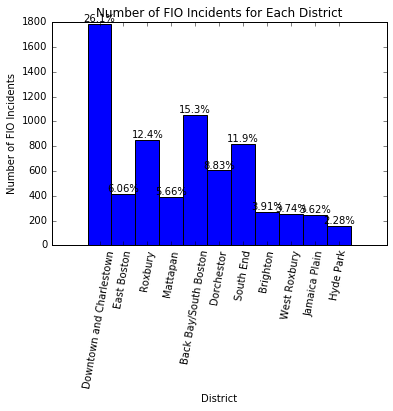

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 6859, 0, 0, 0, 0, 0]


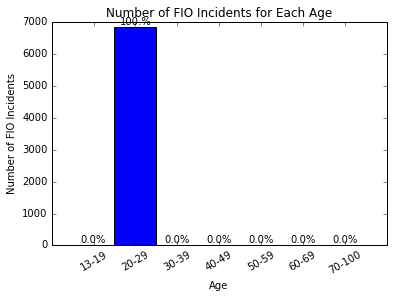

Sex:  ['MALE']
Counts based on Sex:  [6859]


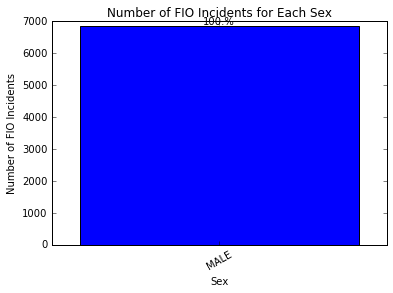

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [914, 1000, 983, 970, 1063, 1084, 845]


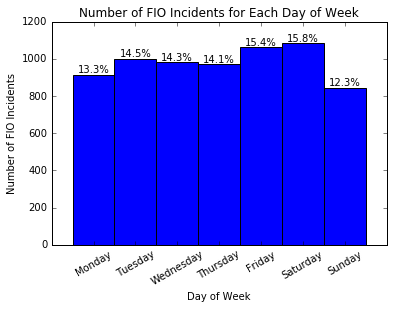


Plots for Cluster 2 from Kmeans++...

There are 14586 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [10389]


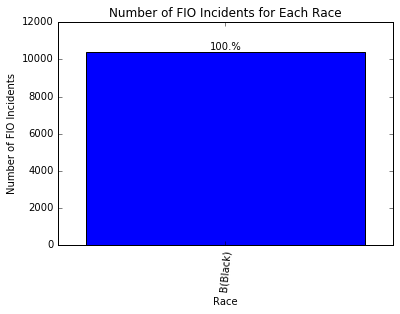

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [370, 106, 3329, 2585, 211, 1726, 820, 120, 146, 567, 365]


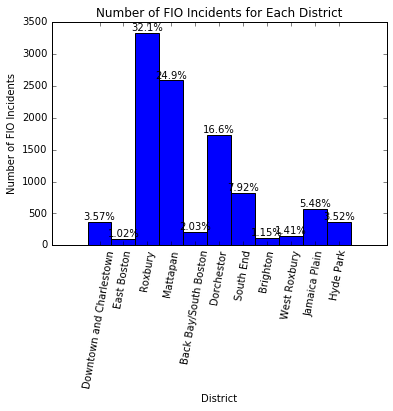

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [10389, 0, 0, 0, 0, 0, 0]


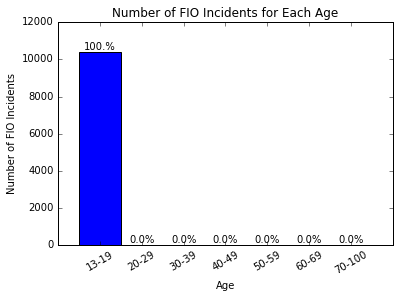

Sex:  ['MALE']
Counts based on Sex:  [10389]


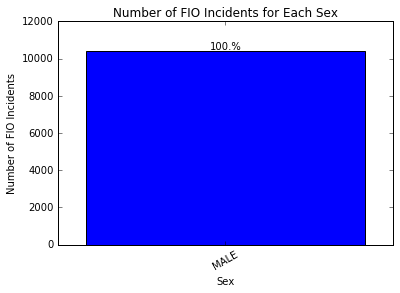

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [1546, 1386, 1561, 1590, 1766, 1505, 1035]


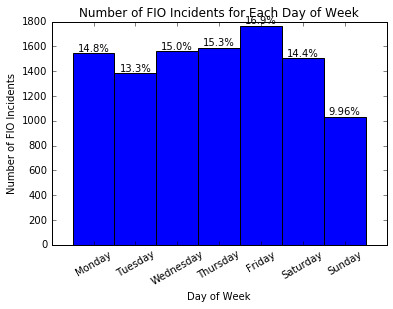


Plots for Cluster 3 from Kmeans++...

There are 42191 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [32832]


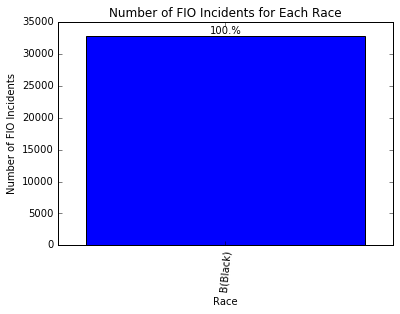

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [1231, 324, 12443, 8404, 619, 4932, 2281, 169, 358, 1305, 615]


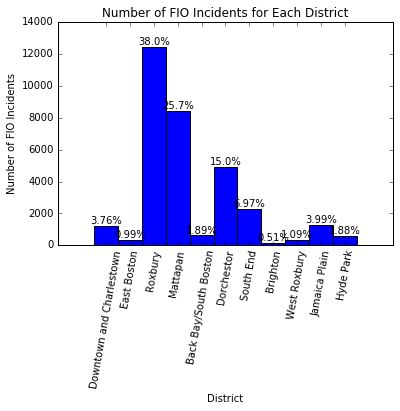

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 32832, 0, 0, 0, 0, 0]


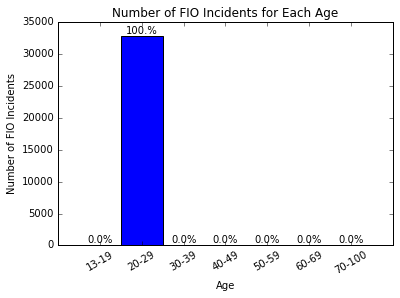

Sex:  ['MALE']
Counts based on Sex:  [32832]


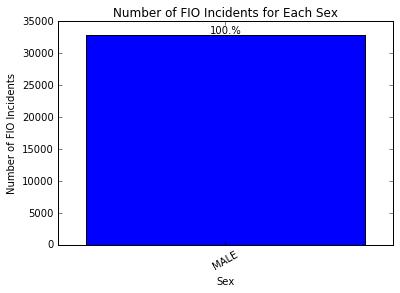

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [4433, 4849, 4762, 4882, 5141, 5081, 3684]


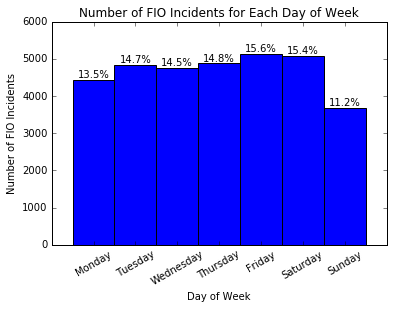


Plots for Cluster 4 from Kmeans++...

There are 12604 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [9916]


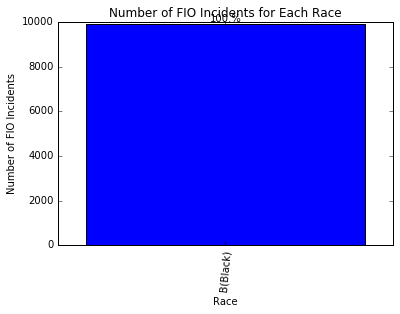

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [835, 75, 3079, 2357, 292, 1408, 1040, 86, 118, 399, 163]


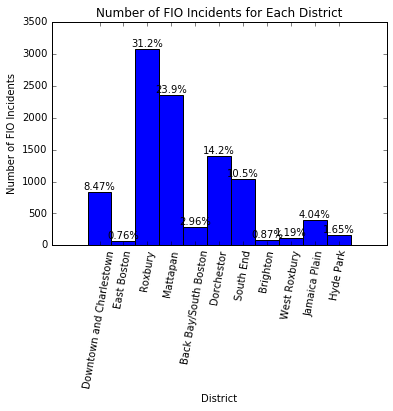

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 9916, 0, 0, 0, 0]


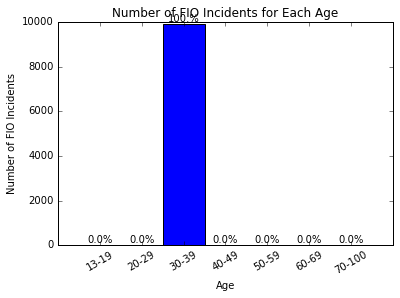

Sex:  ['MALE']
Counts based on Sex:  [9916]


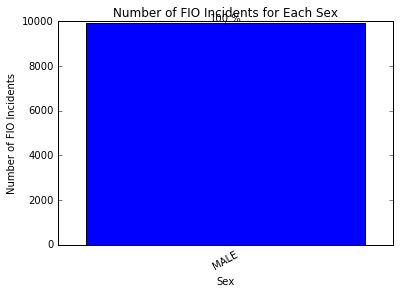

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [1341, 1545, 1392, 1432, 1556, 1543, 1107]


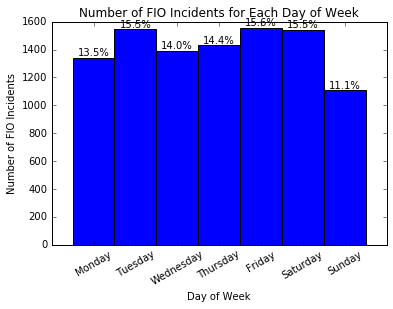


Plots for Cluster 5 from Kmeans++...

There are 4349 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [3164]


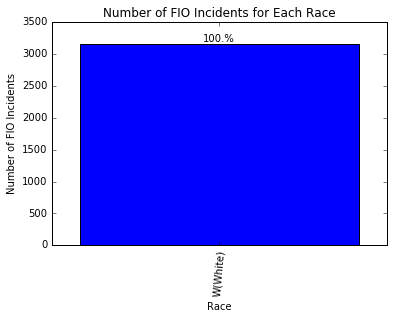

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [1000, 274, 226, 86, 485, 220, 493, 92, 100, 129, 51]


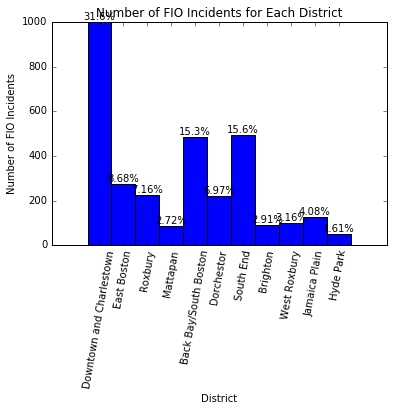

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 3164, 0, 0, 0]


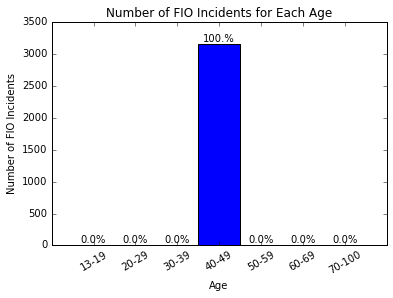

Sex:  ['MALE']
Counts based on Sex:  [3164]


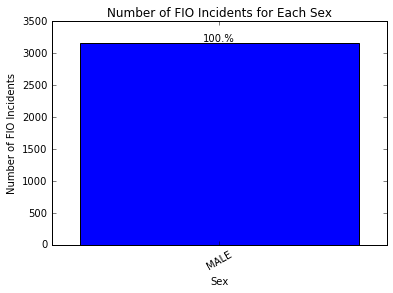

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [471, 542, 486, 479, 479, 398, 309]


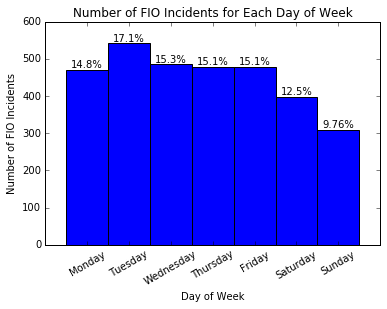


Plots for Cluster 6 from Kmeans++...

There are 6390 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [4802]


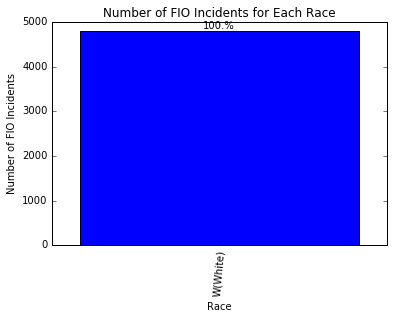

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [1397, 311, 465, 172, 817, 372, 710, 148, 149, 168, 75]


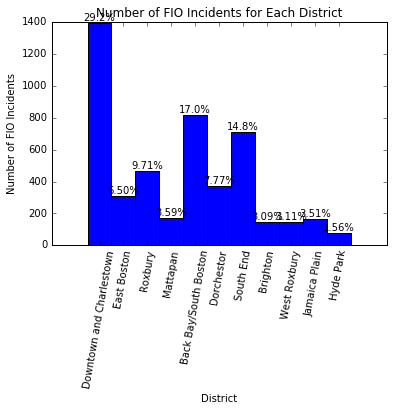

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 4802, 0, 0, 0, 0]


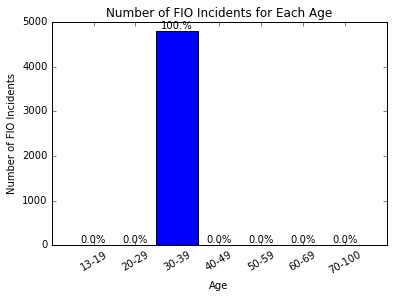

Sex:  ['MALE']
Counts based on Sex:  [4802]


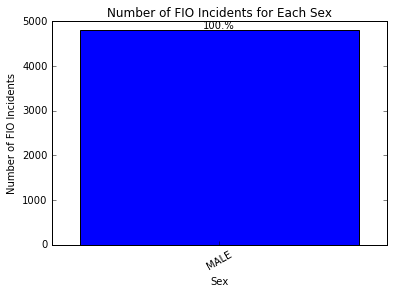

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [668, 822, 767, 731, 683, 605, 526]


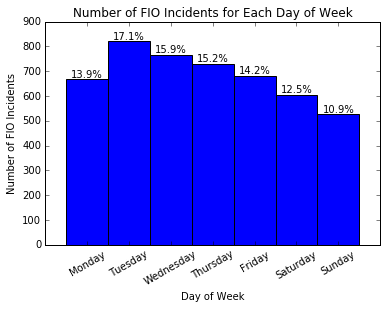


Plots for Cluster 7 from Kmeans++...

There are 3421 entries in this cluster.

Race:  ['H(Hispanic)']
Counts based on Race:  [2482]


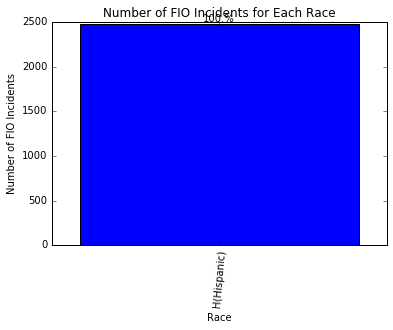

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [120, 420, 564, 270, 133, 223, 257, 25, 145, 200, 112]


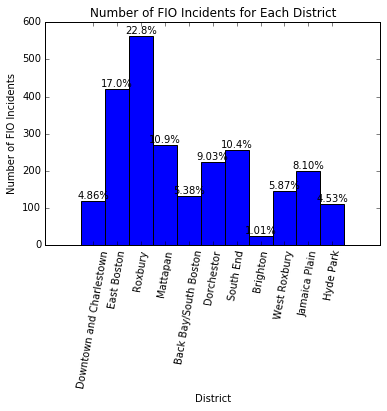

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [2482, 0, 0, 0, 0, 0, 0]


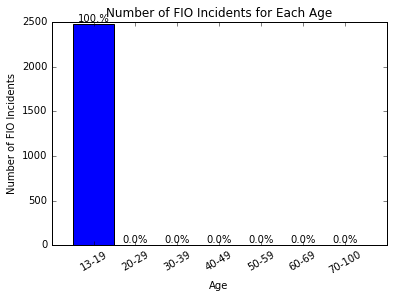

Sex:  ['MALE']
Counts based on Sex:  [2482]


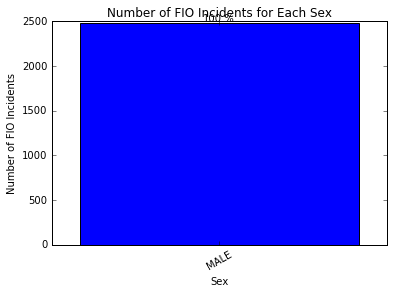

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [343, 364, 375, 379, 423, 346, 252]


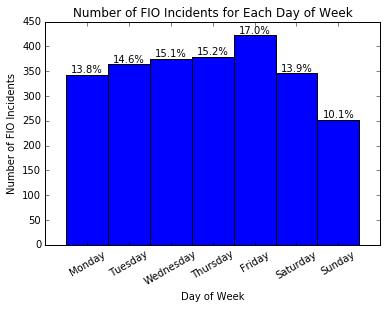


Plots for Cluster 8 from Kmeans++...

There are 6802 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [4996]


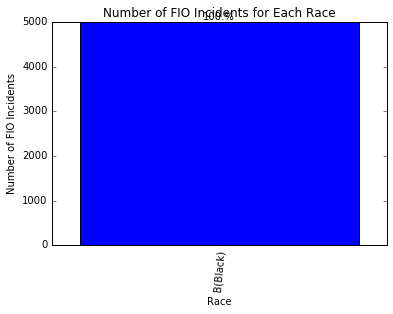

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [832, 40, 1473, 686, 177, 505, 874, 75, 54, 191, 74]


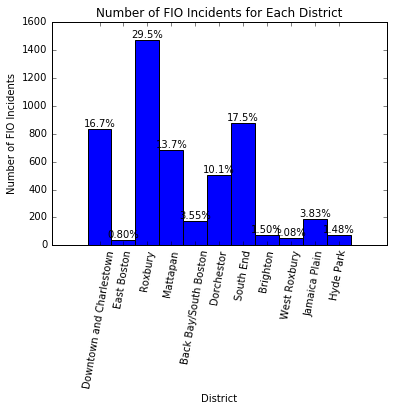

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 4996, 0, 0, 0]


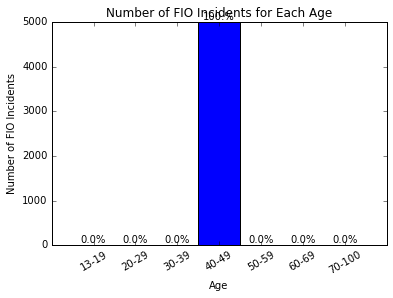

Sex:  ['MALE']
Counts based on Sex:  [4996]


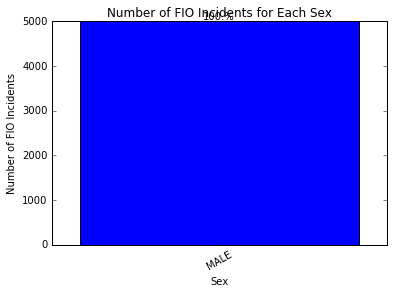

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [671, 832, 757, 795, 748, 702, 491]


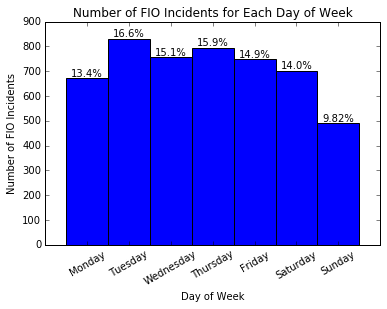


Plots for Cluster 9 from Kmeans++...

There are 1787 entries in this cluster.

Race:  ['H(Hispanic)']
Counts based on Race:  [1393]


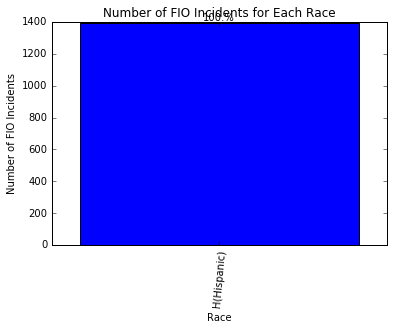

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [239, 186, 285, 77, 69, 79, 256, 22, 20, 124, 28]


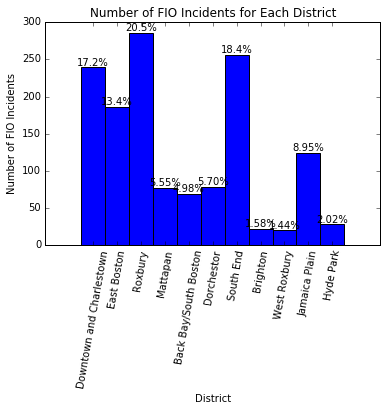

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 1393, 0, 0, 0]


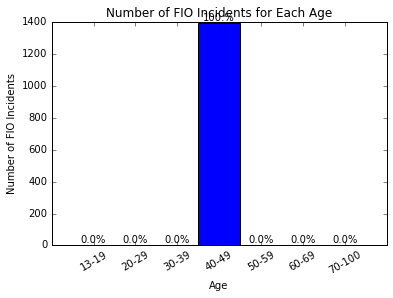

Sex:  ['MALE']
Counts based on Sex:  [1393]


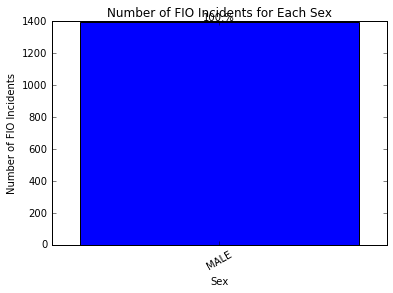

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [233, 253, 204, 200, 191, 158, 154]


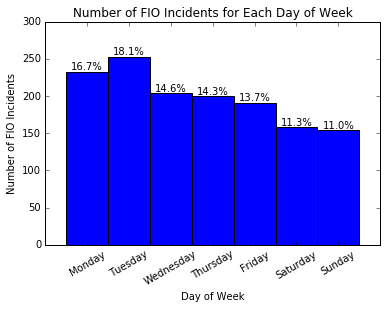


Plots for Cluster 10 from Kmeans++...

There are 2598 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [1952]


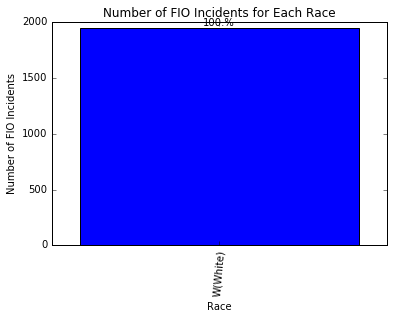

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [364, 103, 149, 74, 416, 423, 209, 58, 44, 82, 18]


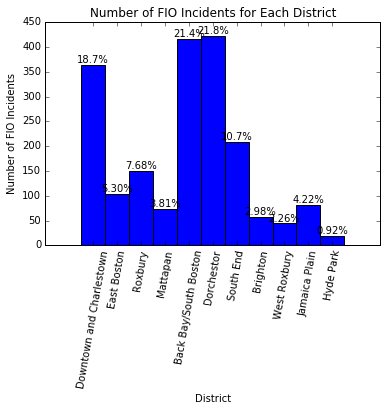

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 1952, 0, 0, 0, 0]


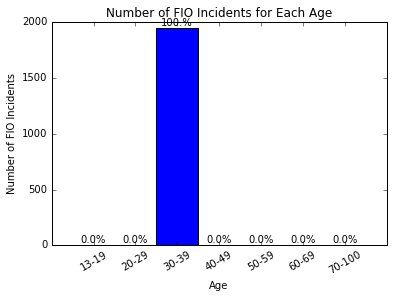

Sex:  ['FEMALE']
Counts based on Sex:  [1952]


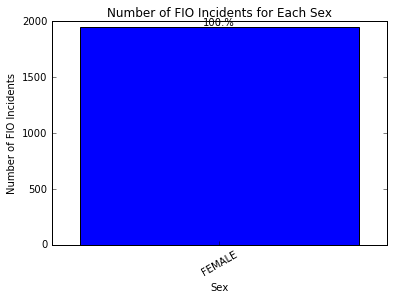

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [254, 350, 302, 324, 303, 221, 198]


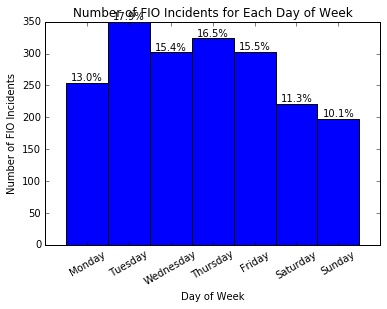


Plots for Cluster 11 from Kmeans++...

There are 3781 entries in this cluster.

Race:  ['H(Hispanic)']
Counts based on Race:  [2951]


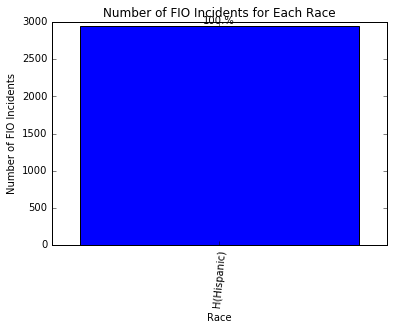

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [286, 334, 706, 279, 137, 184, 560, 42, 88, 249, 62]


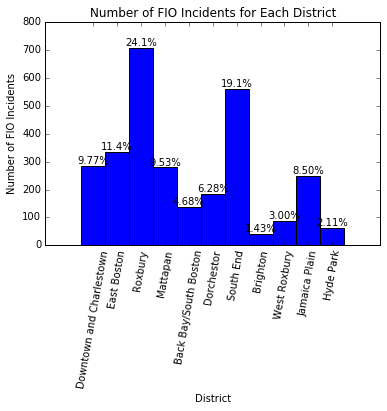

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 2951, 0, 0, 0, 0]


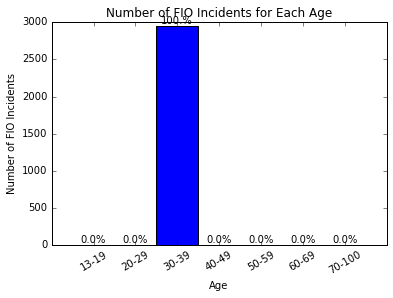

Sex:  ['MALE']
Counts based on Sex:  [2951]


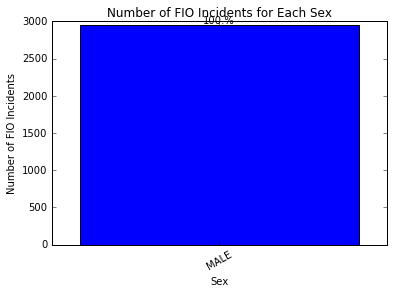

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [442, 447, 483, 414, 443, 406, 316]


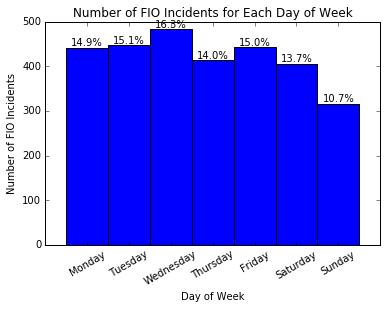


Plots for Cluster 12 from Kmeans++...

There are 732 entries in this cluster.

Race:  []
Counts based on Race:  []


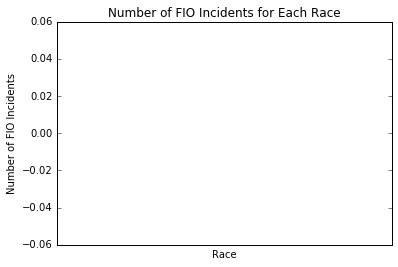

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [72, 17, 193, 71, 42, 83, 32, 18, 14, 29, 14]


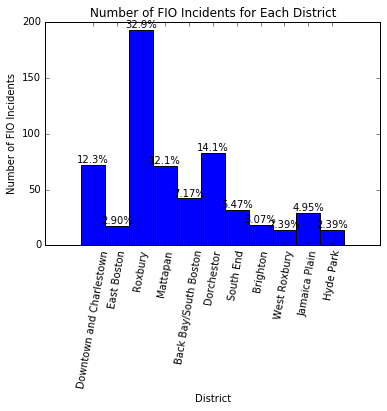

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 593, 0, 0, 0, 0]


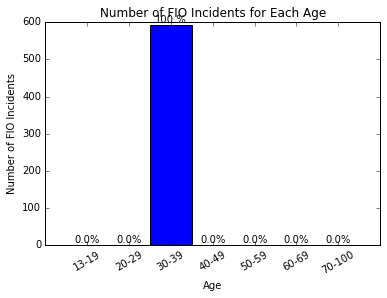

Sex:  ['MALE']
Counts based on Sex:  [593]


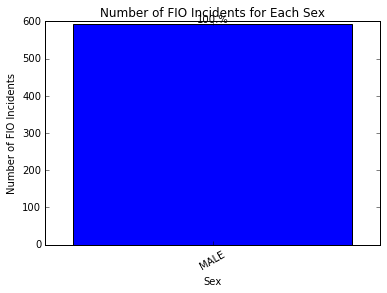

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [78, 96, 83, 89, 100, 84, 63]


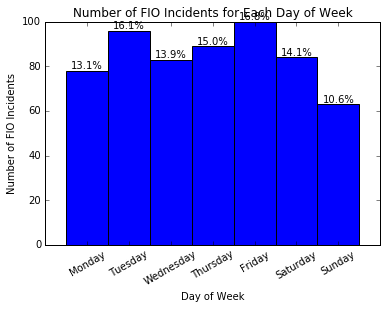


Plots for Cluster 13 from Kmeans++...

There are 3017 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [2299]


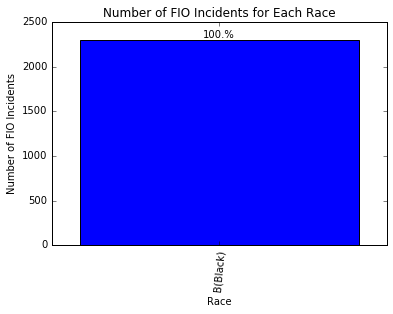

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [166, 18, 765, 495, 84, 404, 164, 16, 33, 84, 64]


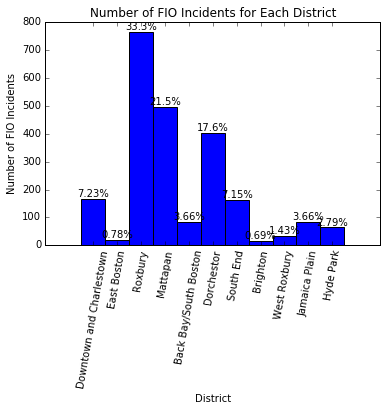

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 2299, 0, 0, 0, 0, 0]


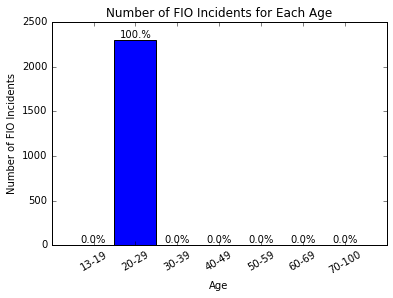

Sex:  ['FEMALE']
Counts based on Sex:  [2299]


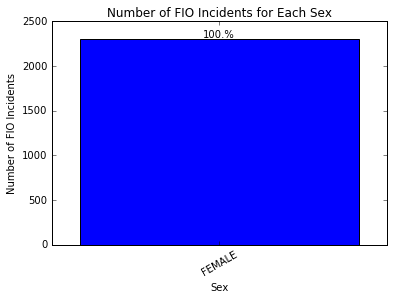

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [295, 364, 343, 330, 340, 359, 268]


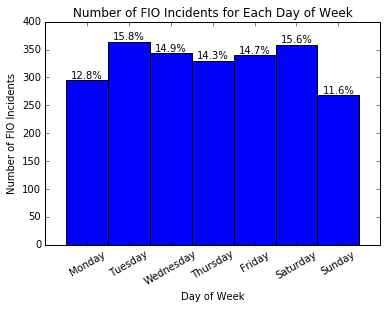


Plots for Cluster 15 from Kmeans++...

There are 3343 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [2507]


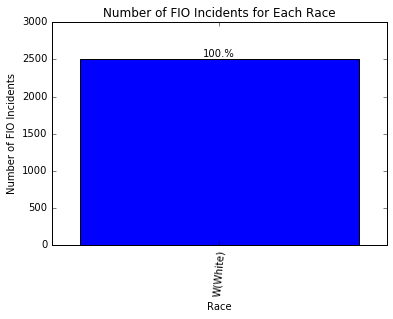

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [530, 115, 240, 149, 551, 390, 238, 100, 64, 79, 40]


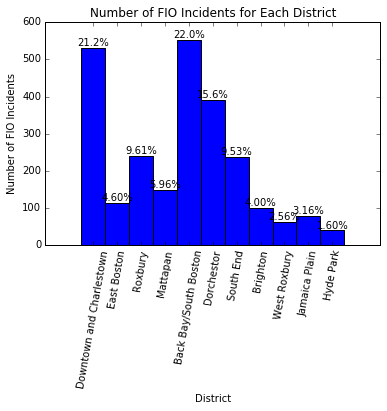

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 2507, 0, 0, 0, 0, 0]


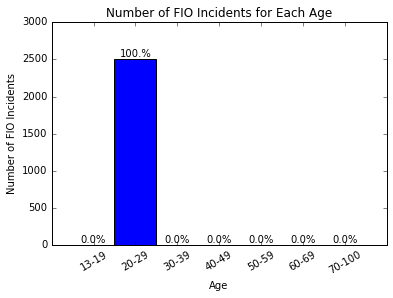

Sex:  ['FEMALE']
Counts based on Sex:  [2507]


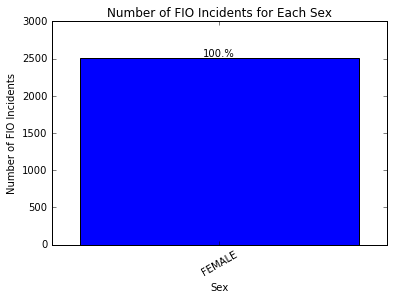

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [348, 400, 408, 368, 381, 334, 268]


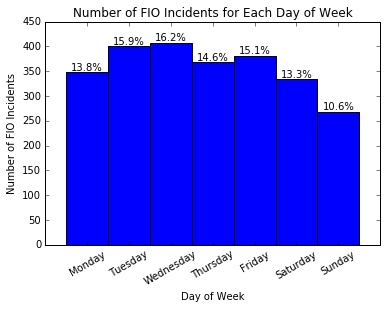


Plots for Cluster 17 from Kmeans++...

There are 632 entries in this cluster.

Race:  ['H(Hispanic)']
Counts based on Race:  [515]


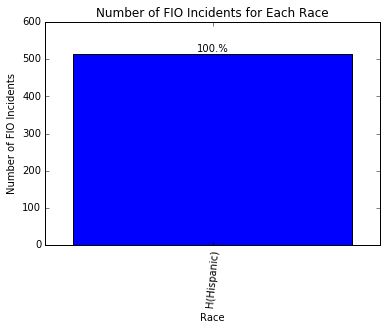

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [87, 61, 105, 27, 38, 32, 79, 11, 14, 45, 12]


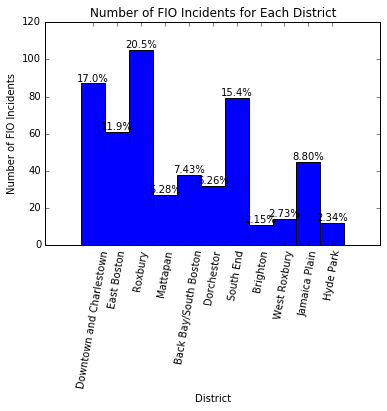

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 515, 0, 0]


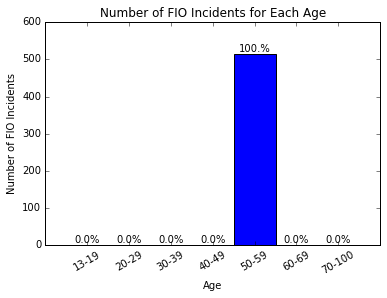

Sex:  ['MALE']
Counts based on Sex:  [515]


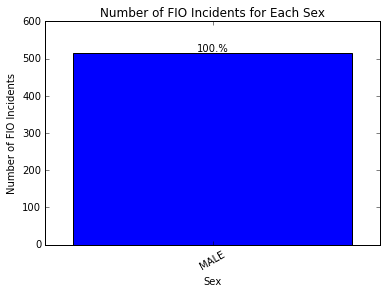

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [87, 96, 71, 76, 76, 48, 61]


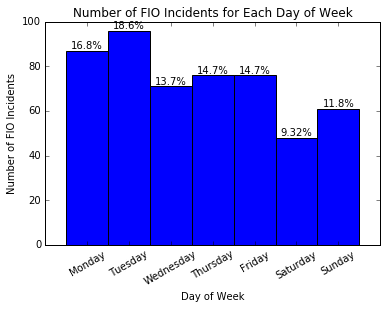


Plots for Cluster 18 from Kmeans++...

There are 2385 entries in this cluster.

Race:  []
Counts based on Race:  []


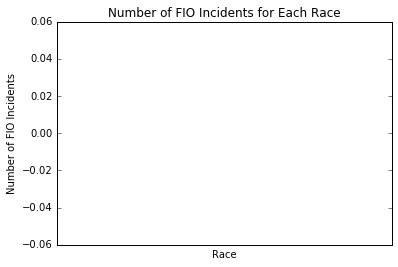

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [139, 50, 651, 378, 74, 352, 66, 22, 22, 56, 52]


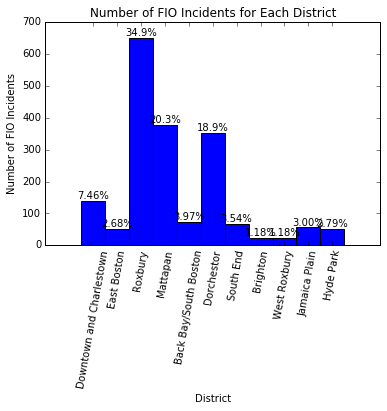

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 1870, 0, 0, 0, 0, 0]


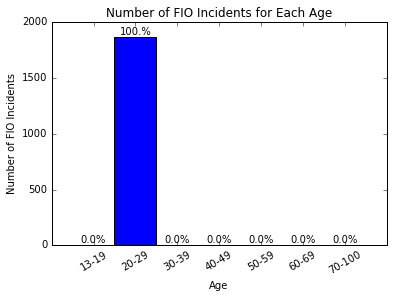

Sex:  ['MALE']
Counts based on Sex:  [1870]


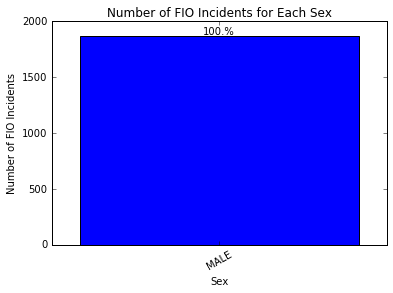

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [243, 279, 253, 285, 323, 280, 207]


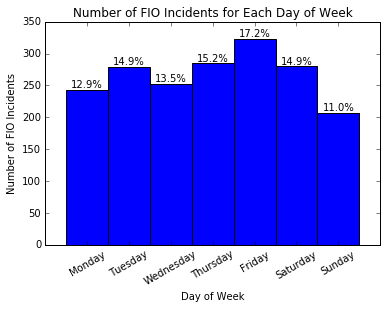


Plots for Cluster 20 from Kmeans++...

There are 1137 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [774]


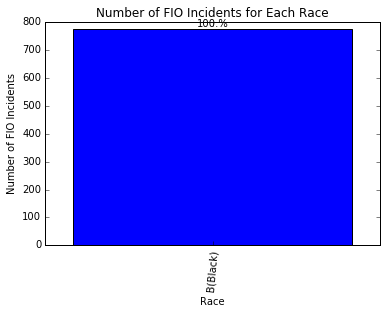

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [70, 10, 172, 164, 47, 167, 41, 7, 15, 32, 43]


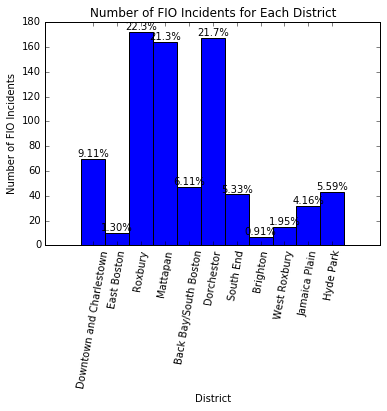

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [774, 0, 0, 0, 0, 0, 0]


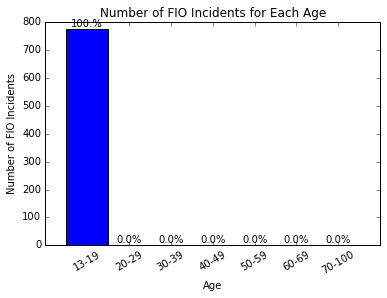

Sex:  ['FEMALE']
Counts based on Sex:  [774]


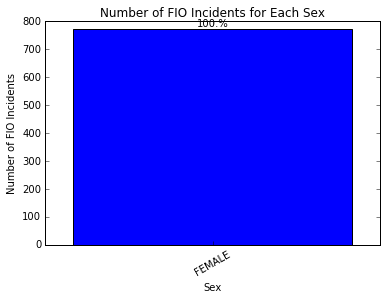

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [140, 102, 100, 161, 118, 87, 66]


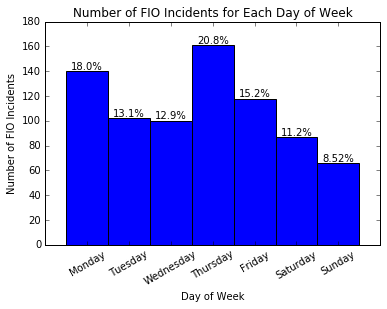


Plots for Cluster 21 from Kmeans++...

There are 573 entries in this cluster.

Race:  ['H(Hispanic)']
Counts based on Race:  [450]


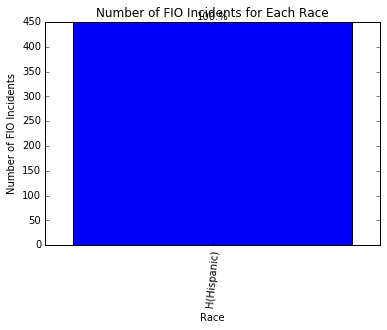

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [46, 52, 100, 62, 37, 39, 39, 7, 21, 29, 16]


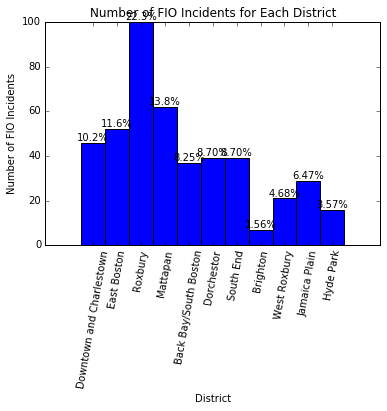

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 450, 0, 0, 0, 0, 0]


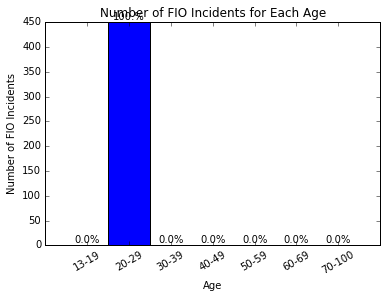

Sex:  ['FEMALE']
Counts based on Sex:  [450]


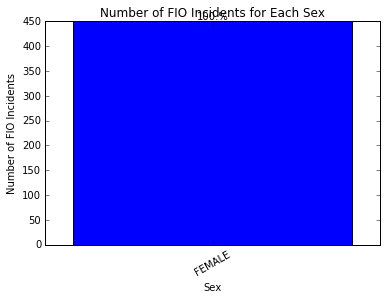

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [72, 70, 48, 65, 68, 63, 64]


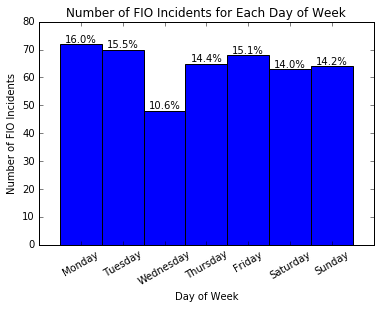


Plots for Cluster 23 from Kmeans++...

There are 952 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [676]


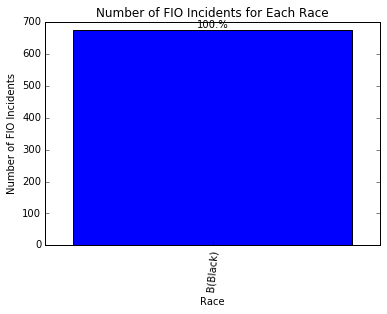

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [37, 3, 299, 50, 30, 100, 99, 11, 6, 27, 11]


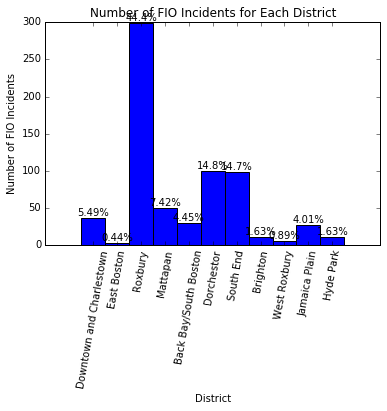

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 676, 0, 0, 0]


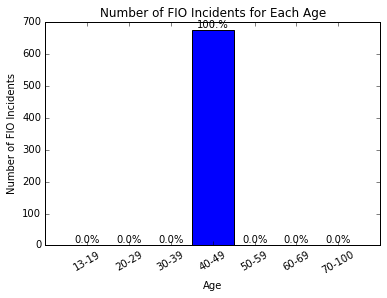

Sex:  ['FEMALE']
Counts based on Sex:  [676]


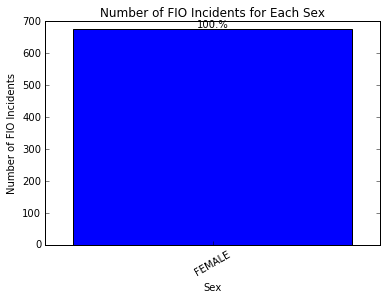

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [93, 110, 105, 120, 92, 91, 65]


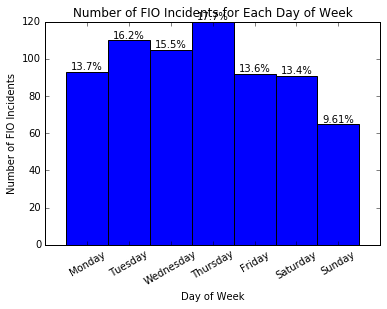


Plots for Cluster 24 from Kmeans++...

There are 2440 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [1846]


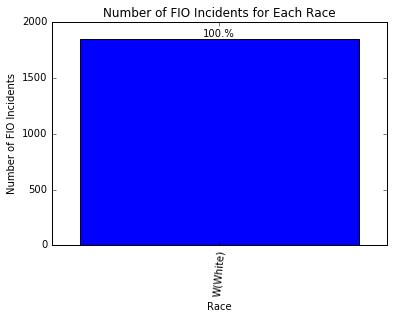

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [500, 165, 128, 46, 321, 133, 307, 80, 58, 68, 33]


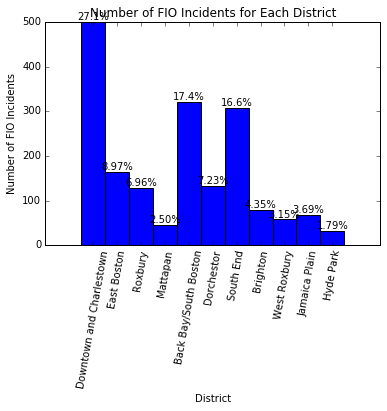

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 1846, 0, 0]


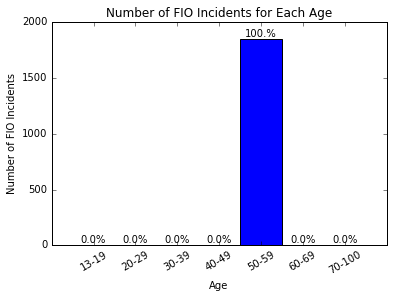

Sex:  ['MALE']
Counts based on Sex:  [1846]


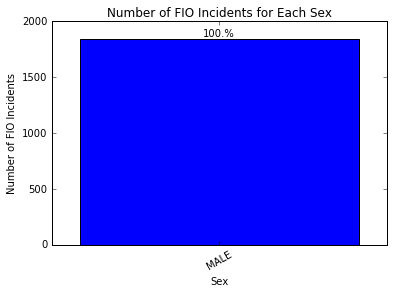

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [243, 303, 301, 278, 283, 242, 196]


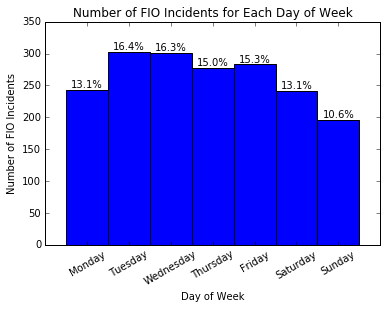


Plots for Cluster 25 from Kmeans++...

There are 8121 entries in this cluster.

Race:  ['H(Hispanic)']
Counts based on Race:  [6417]


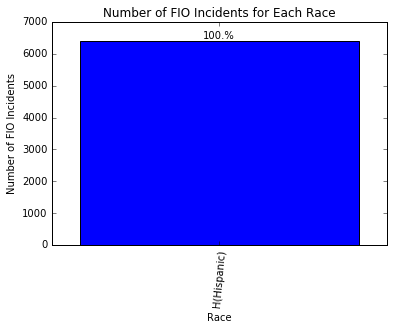

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [416, 686, 1673, 998, 323, 579, 814, 56, 226, 420, 200]


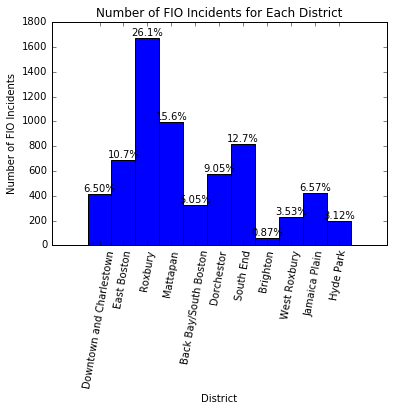

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 6417, 0, 0, 0, 0, 0]


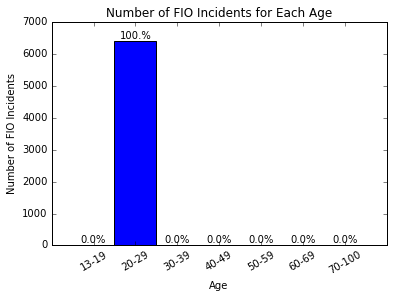

Sex:  ['MALE']
Counts based on Sex:  [6417]


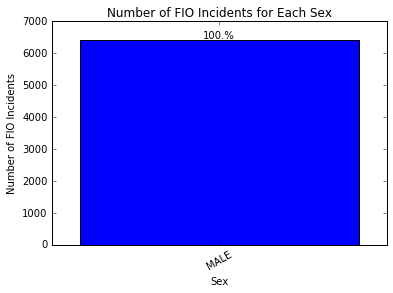

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [902, 970, 839, 917, 1027, 1057, 705]


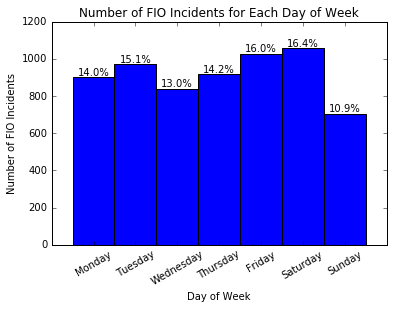


Plots for Cluster 26 from Kmeans++...

There are 876 entries in this cluster.

Race:  []
Counts based on Race:  []


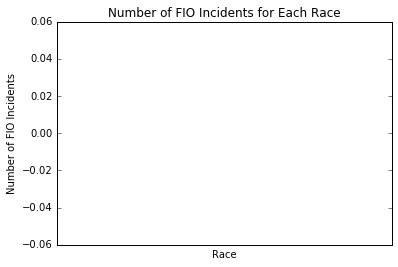

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [44, 23, 159, 135, 23, 99, 37, 5, 19, 26, 27]


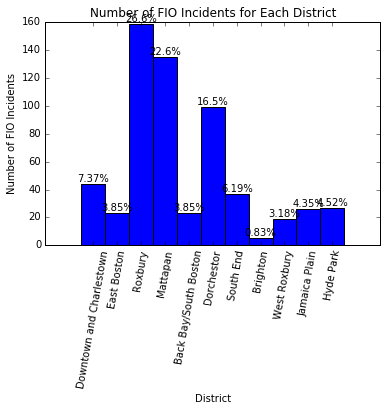

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [609, 0, 0, 0, 0, 0, 0]


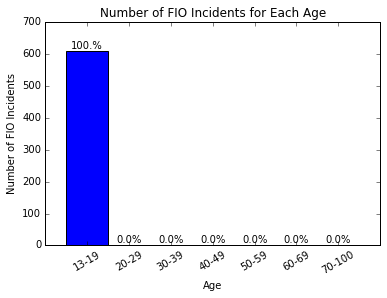

Sex:  ['MALE']
Counts based on Sex:  [609]


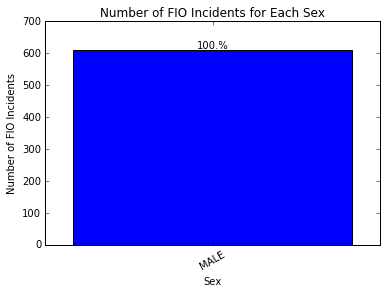

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [67, 80, 85, 106, 123, 80, 68]


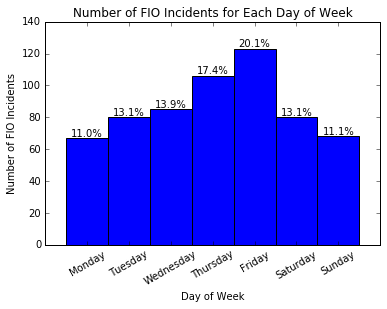


Plots for Cluster 27 from Kmeans++...

There are 1557 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [1223]


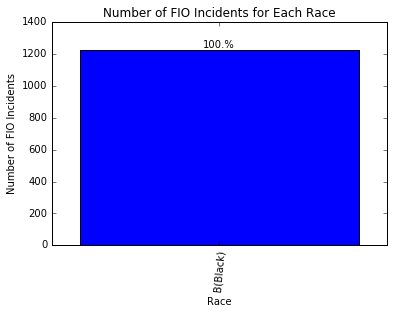

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [107, 14, 371, 216, 48, 203, 102, 21, 20, 78, 32]


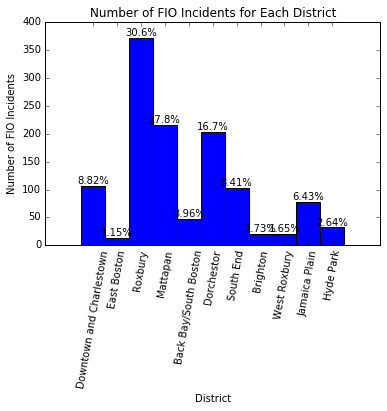

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 0, 0, 0]


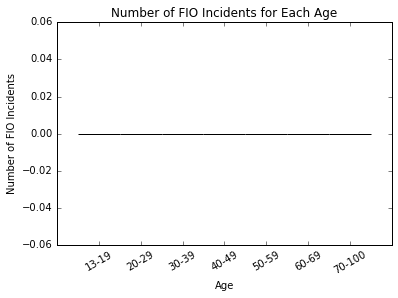

Sex:  ['MALE']
Counts based on Sex:  [1223]


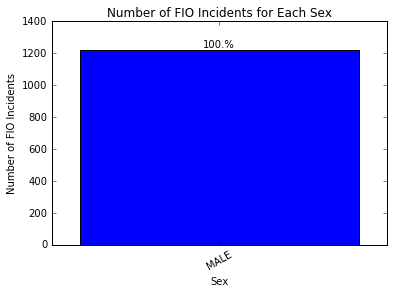

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [169, 194, 167, 215, 189, 164, 125]


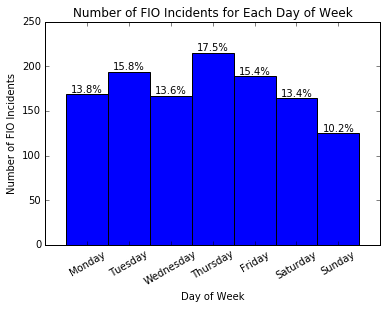


Plots for Cluster 28 from Kmeans++...

There are 565 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [416]


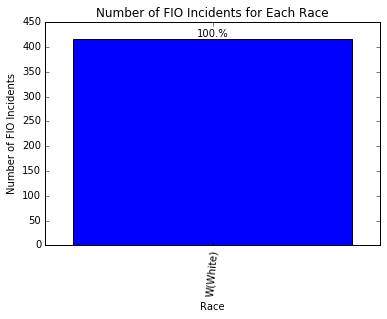

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [95, 33, 28, 4, 95, 24, 42, 53, 15, 20, 6]


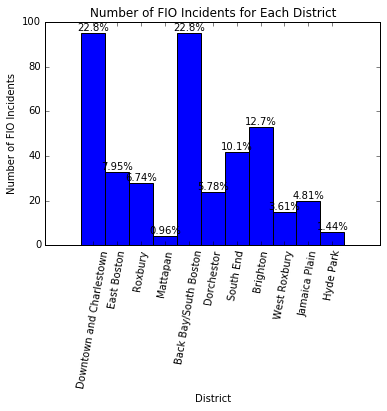

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 0, 0, 0]


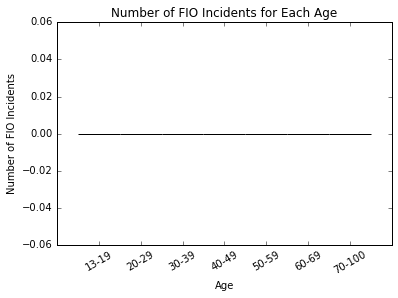

Sex:  ['MALE']
Counts based on Sex:  [416]


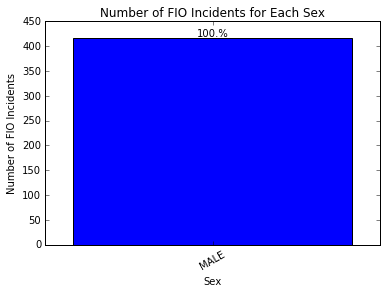

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [53, 61, 77, 65, 55, 52, 53]


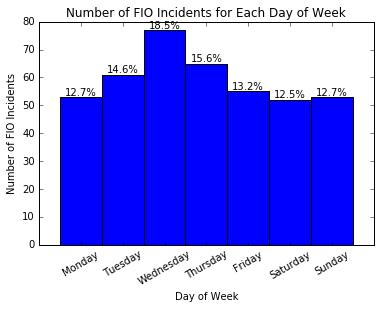


Plots for Cluster 29 from Kmeans++...

There are 1218 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [910]


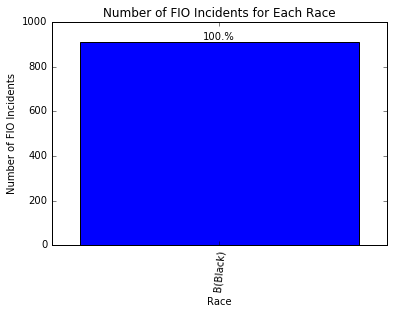

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [83, 9, 334, 126, 30, 169, 81, 7, 19, 34, 17]


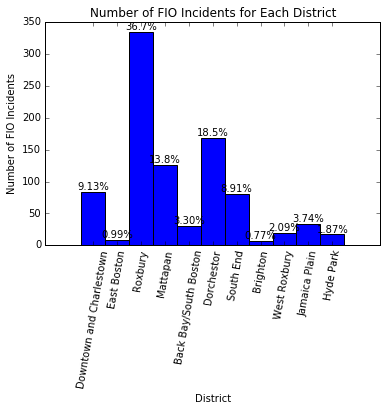

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 910, 0, 0, 0, 0]


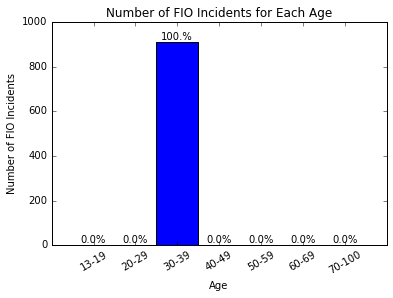

Sex:  ['FEMALE']
Counts based on Sex:  [910]


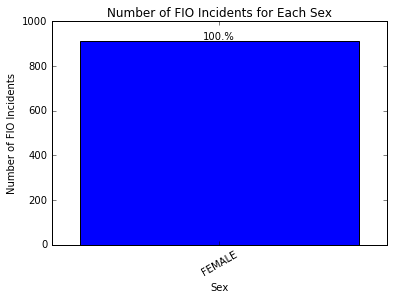

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [130, 158, 150, 151, 113, 116, 92]


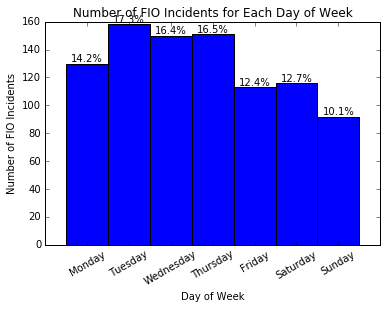


Plots for Cluster 31 from Kmeans++...

There are 1359 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [999]


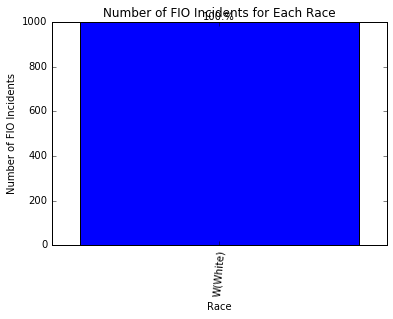

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [265, 55, 91, 34, 192, 152, 128, 15, 28, 21, 14]


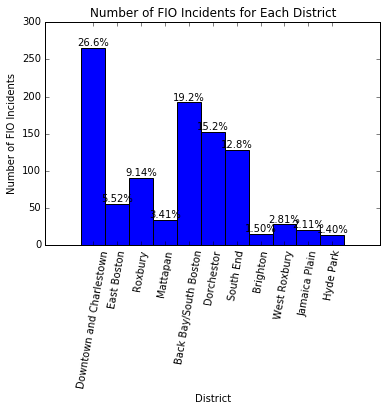

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 999, 0, 0, 0]


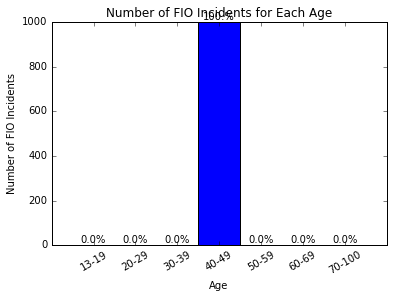

Sex:  ['FEMALE']
Counts based on Sex:  [999]


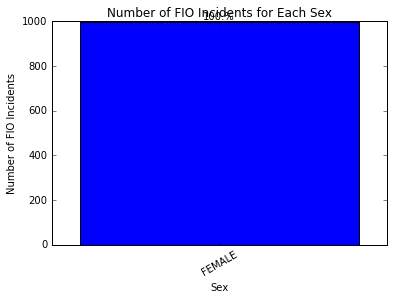

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [130, 190, 161, 167, 136, 113, 102]


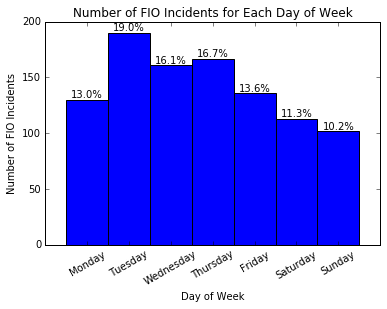


Plots for Cluster 32 from Kmeans++...

There are 1137 entries in this cluster.

Race:  []
Counts based on Race:  []


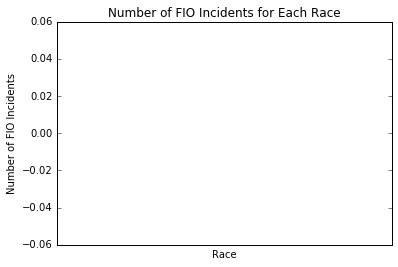

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [110, 25, 360, 128, 39, 141, 61, 16, 27, 38, 24]


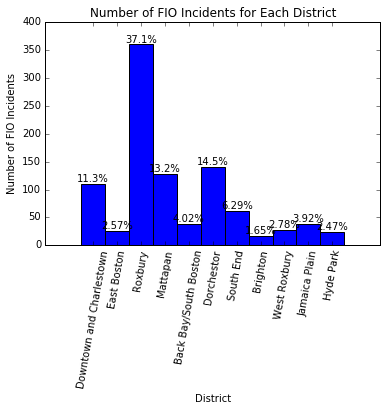

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 0, 0, 0]


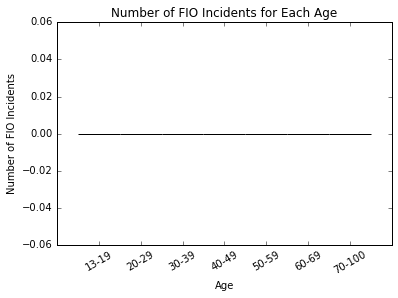

Sex:  ['MALE']
Counts based on Sex:  [979]


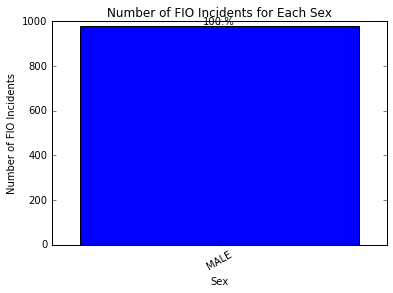

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [132, 132, 147, 145, 187, 143, 93]


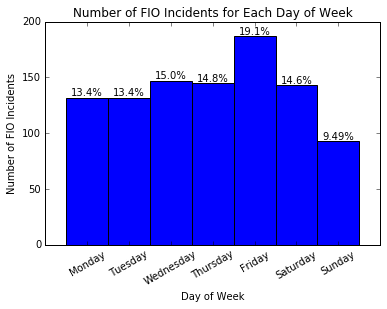


Plots for Cluster 33 from Kmeans++...

There are 482 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [364]


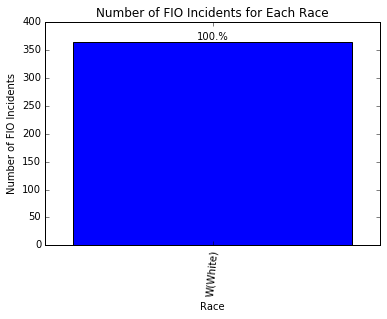

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [80, 45, 21, 5, 60, 30, 52, 16, 24, 24, 6]


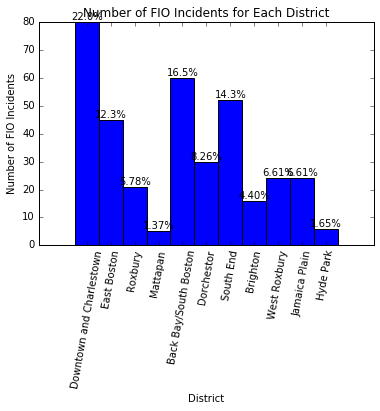

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 0, 364, 0]


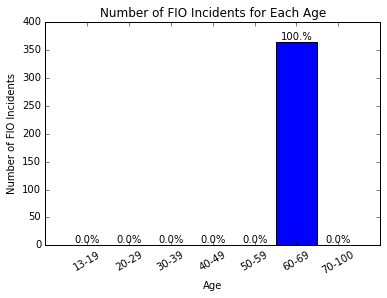

Sex:  ['MALE']
Counts based on Sex:  [364]


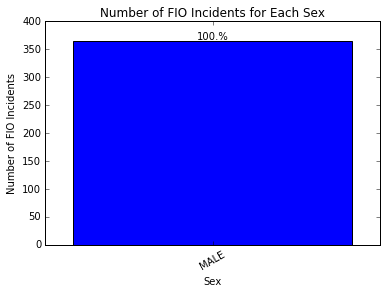

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [62, 55, 58, 55, 62, 37, 35]


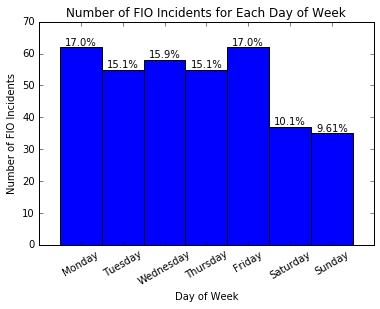


Plots for Cluster 34 from Kmeans++...

There are 359 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [256]


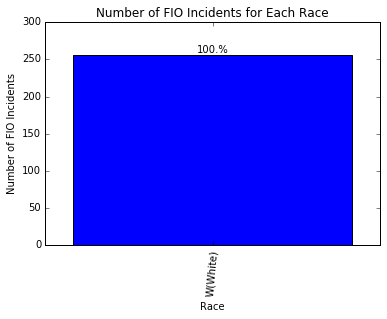

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [66, 18, 21, 11, 63, 21, 14, 3, 23, 7, 6]


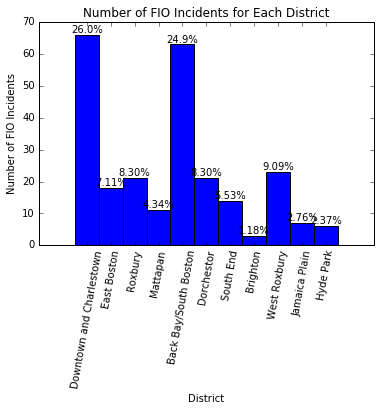

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [256, 0, 0, 0, 0, 0, 0]


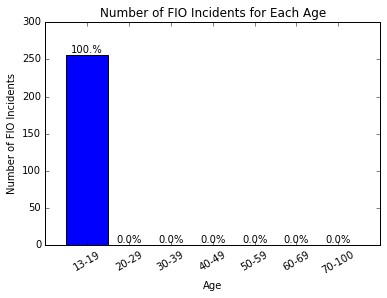

Sex:  ['FEMALE']
Counts based on Sex:  [256]


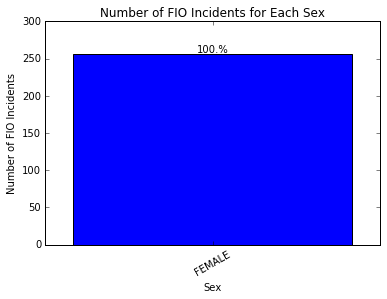

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [26, 35, 31, 40, 43, 48, 33]


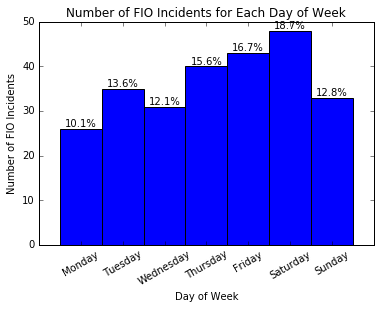


Plots for Cluster 35 from Kmeans++...

There are 379 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [299]


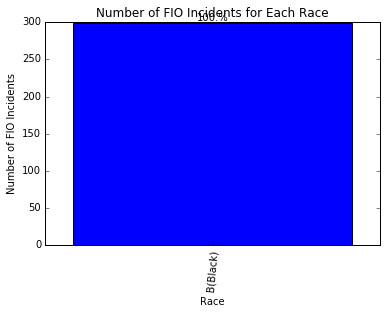

District:  ['A1', 'B2', 'B3', 'C11', 'C6', 'D14', 'D4', 'E13', 'E18', 'E5']
Counts based on District:  [35, 127, 16, 42, 7, 3, 38, 14, 7, 7]


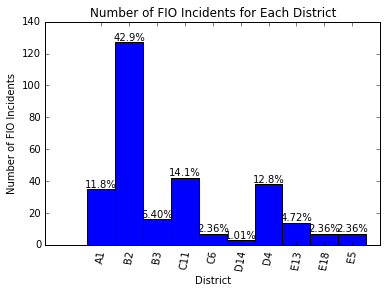

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 299, 0, 0]


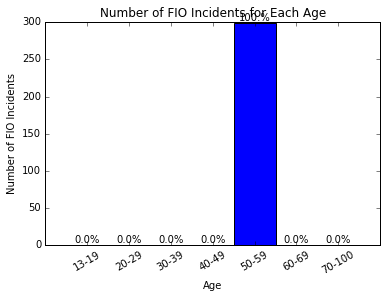

Sex:  ['FEMALE']
Counts based on Sex:  [299]


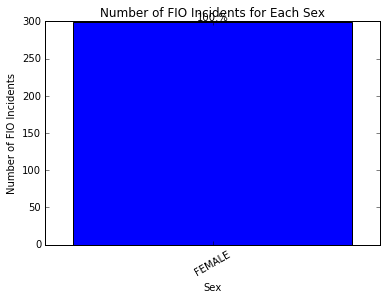

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [41, 54, 52, 49, 45, 31, 27]


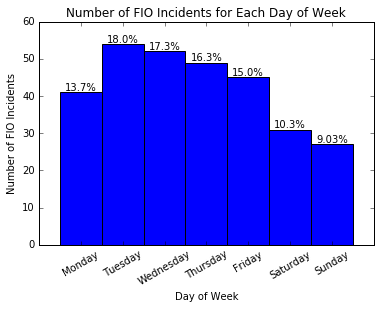


Plots for Cluster 36 from Kmeans++...

There are 2303 entries in this cluster.

Race:  ['W(White)']
Counts based on Race:  [1630]


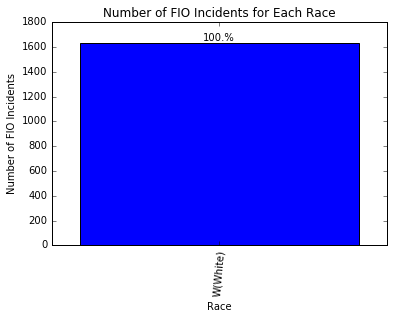

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [356, 127, 142, 93, 296, 141, 142, 44, 131, 106, 42]


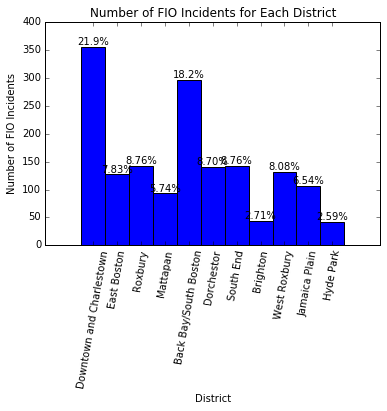

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [1630, 0, 0, 0, 0, 0, 0]


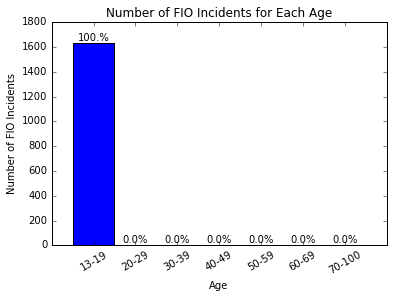

Sex:  ['MALE']
Counts based on Sex:  [1630]


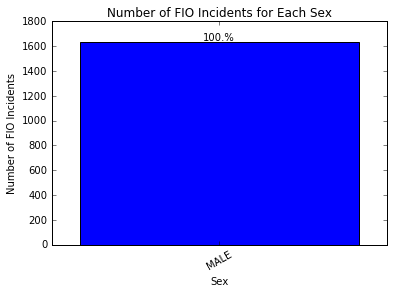

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [228, 221, 203, 224, 275, 287, 192]


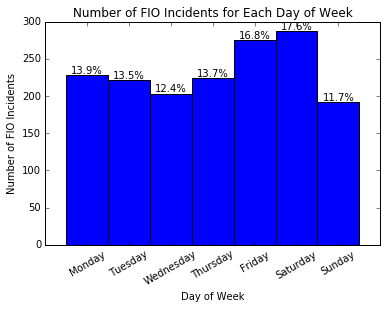


Plots for Cluster 37 from Kmeans++...

There are 586 entries in this cluster.

Race:  ['B(Black)']
Counts based on Race:  [453]


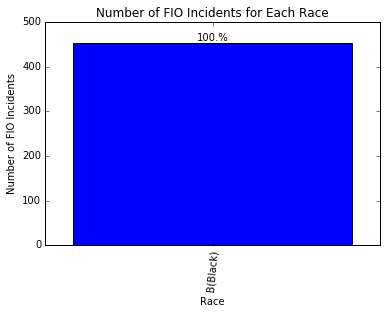

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [50, 4, 200, 38, 18, 43, 57, 7, 7, 17, 8]


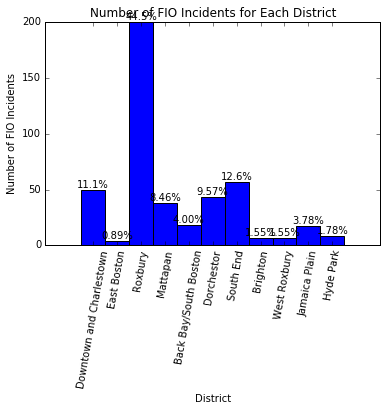

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [0, 0, 0, 0, 0, 453, 0]


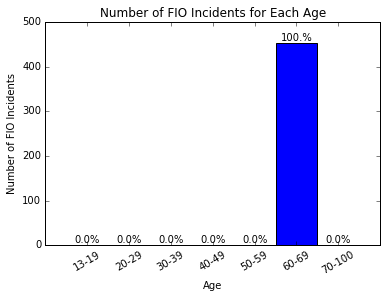

Sex:  ['MALE']
Counts based on Sex:  [453]


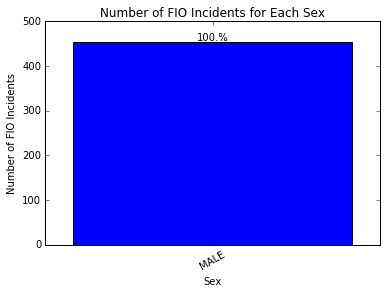

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [60, 87, 72, 67, 76, 56, 35]


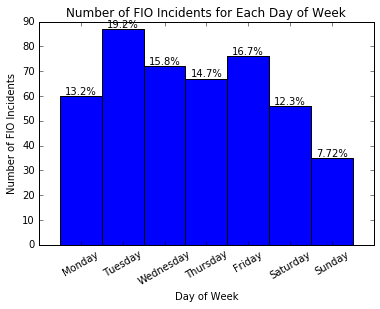

In [196]:
import datetime

def order_days(days, counts):
    """
    Orders the days of the week in a more readable way before plotting.
    """
    if(counts is not None):     
        days = [days[1]] + days[5:7] + [days[4]] + [days[0]] + days[2:4]
        counts = [counts[1]] + counts[5:7] + [counts[4]] + [counts[0]] + counts[2:4]
        return days, counts
    else:
        days = [days[1]] + days[5:7] + [days[4]] + [days[0]] + days[2:4]
        return days

def order_districts(districts, counts):
    """
    Orders the districts in a more readable way before plotting.
    """        
        
    if(counts is not None):
        districts = [districts[0] + " & " + districts[1]] + districts[2:5] + [districts[6]] + [districts[5]] + [districts[8]] + [districts[7]] + [districts[11]] + [districts[9]] + [districts[10]]
        counts = [counts[0] + counts[1]] + counts[2:5] + [counts[6]] + [counts[5]] + [counts[8]] + [counts[7]] + [counts[11]] + [counts[9]] + [counts[10]]
        return districts, counts
    else:
        districts = [districts[0] + " & " + districts[1]] +districts[2:5] + [districts[6]] + [districts[5]] + [districts[8]] + [districts[7]] + [districts[11]] + [districts[9]] + [districts[10]]
        return districts
    
def bin_ages(ages, counts):
    """
    Creates bins for the categories of ages before plotting.
    """
    binned_ages = ["13-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-100"]
    binned_counts = [0] * 7
    for i in range(len(ages)):
        a = ages[i]
        count = counts[i]
        if a >= 13 and a <= 19:
            binned_counts[0] += counts[i]
        if a >= 20 and a <= 29:
            binned_counts[1] += counts[i]
        if a >= 30 and a <= 39:
            binned_counts[2] += counts[i]
        if a >= 40 and a <= 49:
            binned_counts[3] += counts[i]
        if a >= 50 and a <= 59:
            binned_counts[4] += counts[i]
        if a >= 60 and a <= 69:
            binned_counts[5] += counts[i]
        if a >= 70 and a <= 100:
            binned_counts[6] += counts[i]
    return binned_ages, binned_counts

def add_day_col_and_year_col(df):
    """
    Adds day of week column to the original fio df based on the date column.
    """
    date_col = df["FIO_DATE"]
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    dates = []
    years = []
    for date in date_col:
        d = date.split(" ")[0].split("/")
        wday = datetime.datetime(int(d[2]), int(d[0]), int(d[1])).weekday()
        dates +=[weekdays[wday]]
        years += [int(d[2])]
    df["DAY_OF_WEEK"] = dates
    df["YEAR"] = years
    return df

def plot_attribute(df, attribute, name, inclusion = None, exclusion = None, reorder_func = None, 
                           xlabels = None, label_rotation = 30, increase_ylim = False, increase = None, graph = "fio"):
    """
    parameters:
        df: original Pandas dataframe
        attribute: string, the column name of the Pandas dataframe that we are going to groupby
        name: string, the "name" of the column (what will be printed)
        inclusion: a collection that you would like these attributes to be a part of (used to filter results)
        exclusion: a collection that you would NOT like these attributes to be a part of (used to filter results)
        reorder_func: a function that orders the bars, creates bins, or manipulates the attribs and counts in any way
        xlabels: string, labels for the x-axis (by default the attribute names)
        label_rotation: int, rotation of x labels
        increase_ylim: boolean, makes the percentage labels more visible
    
    Plots the specificed attribute using the groupby function in a bar plot with shown percentages.
    """
    if(graph == "crime"):
        filtered_df = df.loc[df["Year"].isin(["2012", "2013", "2014", "2015"])]
    else:
        filtered_df = df.loc[df["YEAR"].isin([2012, 2013, 2014, 2015])]
        
    attr_groups = filtered_df.groupby(attribute)
    attribs, counts = [], []
 
    #obtain desired attributes and their respective counts
    for group in attr_groups:
        if(inclusion is not None and group[0] in inclusion):
            attribs += [group[0]]
            counts += [len(group[1])]
        elif(exclusion is not None and group[0] not in exclusion):
            attribs += [group[0]]
            counts += [len(group[1])]
        elif (exclusion is None and inclusion is None):
            attribs += [group[0]]
            counts += [len(group[1])]
    
    if(reorder_func is not None):
        if(attribute == "DIST" and len(attribs) == 12):
            attribs, counts = reorder_func(attribs, counts)
        if(attribute != "DIST"):
            attribs, counts = reorder_func(attribs, counts)
            
    print(name + ": ", attribs)
    print("Counts based on " + name + ": ", counts)
    
    #plot bar graph
    fig, ax = plt.subplots()
    rects = plt.bar(np.arange(len(attribs)), counts, align = "center", width = 1)
    
    if(increase_ylim and increase is None):
        print("Need to enter increase amount.")
    elif(increase_ylim):
        plt.ylim(min(counts), max(counts) + increase) #increase y-axis height for label clarity
        
    if(graph == "crime"):
        plt.title("Number of Crimes for Each " + name)
        plt.ylabel("Number of Crimes")
    else:
        plt.title("Number of FIO Incidents for Each " + name)
        plt.ylabel("Number of FIO Incidents")

        
    plt.xlabel(name)
    
    if(xlabels is not None):
        if(attribute == "DIST" and len(attribs) < 11):
            plt.xticks(np.arange(len(attribs)), attribs, rotation = label_rotation)
        else:
            plt.xticks(np.arange(len(attribs)), xlabels, rotation = label_rotation)
    else:
        plt.xticks(np.arange(len(attribs)), attribs, rotation = label_rotation)
    
    total_count = sum(counts)
    
#     apply percentage labels on each bar
    if (total_count != 0):
        percentages = []
        for i in range(len(rects)):  
            height = rects[i].get_height()
            ax.text(rects[i].get_x() + rects[i].get_width()/2.,height,
                str((height/total_count) * 100)[:4] + "%", ha='center', va='bottom')
            if(xlabels is None or (attribute == "DIST" and len(attribs) < 11)):
                percentages.append(((height/total_count) * 100, attribs[i]))
            else:
                percentages.append(((height/total_count) * 100, xlabels[i]))
    else:
        percentages = [0]
                
    plt.show()
    return max(percentages)


district_names = ["Downtown and Charlestown", "East Boston", "Roxbury", "Mattapan", "Back Bay/South Boston", "Dorchestor", 
                      "South End", "Brighton", "West Roxbury", "Jamaica Plain", "Hyde Park"]
origin_df = add_day_col_and_year_col(origin_df)
origin_df["dbscan_CLUSTER"] = pd.Series(pred, index = df.index)
origin_df["kmeans_CLUSTER"] = pd.Series(labels, index = df.index)
# plot_attribute(origin_df, "dbscan_CLUSTER", "Cluster", label_rotation = 30)
# plot_attribute(origin_df, "kmeans_CLUSTER", "Cluster", label_rotation = 0)

kmeans_groups = origin_df.groupby("kmeans_CLUSTER")
dbscan_groups = origin_df.groupby("dbscan_CLUSTER")

kmeans_data = [(cluster, pd.DataFrame(rows)) for cluster, rows in kmeans_groups if cluster != -1]
dbscan_data = [(cluster, pd.DataFrame(rows)) for cluster, rows in dbscan_groups if cluster != -1]

kmeans_cluster_sizes = [len(rows)  for cluster, rows in kmeans_groups if cluster != -1]
dbscan_cluster_sizes = [len(rows)  for cluster, rows in dbscan_groups if cluster != -1]
sorted_kmeans = np.argsort(kmeans_cluster_sizes)
sorted_dbscan = np.sort(dbscan_cluster_sizes)

print("\nDBSCAN cluster sizes: ")
print(sorted_dbscan)
filtered_dbscan = [(cluster,len(dataframe)) for cluster, dataframe in dbscan_data if len(dataframe) > 300]
print("\nClusters of size < 300 in DBSCAN: ")
print(filtered_dbscan)
print("\nNumber of clusters of size < 300 in DBSCAN: ", len(filtered_dbscan))

#dbscan
dbscan_cluster_maximums = {}
for cluster, dataframe in dbscan_data:
    if(len(dataframe) > 300):
        print("\nPlots for Cluster " + str(cluster) + " from Kmeans++...\n")
        print("There are " + str(len(dataframe)) + " entries in this cluster.\n")
        max_perc_race = plot_attribute(dataframe, "RACE_DESC", "Race", exclusion = "NO DATA ENTERED UNKNOWN", label_rotation = 85)
        max_perc_district = plot_attribute(dataframe, "DIST", "District", inclusion = "A1A15A7B2B3C6C11D4D14E5E13E18", reorder_func = order_districts, 
                           xlabels = district_names, label_rotation = 80, graph = "fio")
        max_perc_age = plot_attribute(dataframe, "AGE_AT_FIO_CORRECTED", "Age", inclusion = range(1, 101), reorder_func=bin_ages, graph = "fio")
        max_perc_sex = plot_attribute(dataframe, "SEX", "Sex", exclusion = "UNKNOWN", graph = "fio")
        max_perc_day = plot_attribute(dataframe, "DAY_OF_WEEK", "Day of Week", reorder_func = order_days, graph = "fio")
        dbscan_cluster_maximums[cluster] = [("size", len(dataframe)),max_perc_race, max_perc_district, max_perc_sex, max_perc_age, max_perc_day]

Kmeans++ cluster sizes: 
[1 2 0]

Plots for Cluster 0 from Kmeans++...

There are 122049 entries in this cluster.

Race:  ['A(Asian or Pacific Islander)', 'B(Black)', 'H(Hispanic)', 'I(American Indian or Alaskan Native)', 'M(Middle Eastern or East Indian)', 'W(White)']
Counts based on Race:  [386, 63511, 7140, 54, 255, 19656]


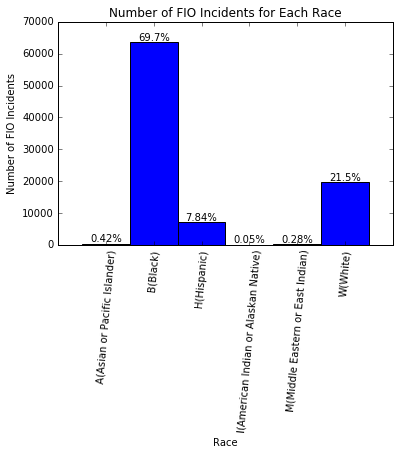

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [10087, 2945, 26175, 16444, 5448, 12168, 9779, 1354, 1661, 4073, 1931]


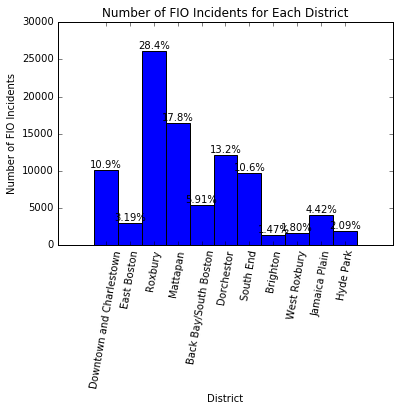

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [13104, 44803, 20531, 10084, 3253, 228, 192]


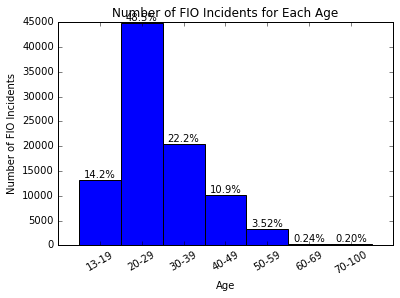

Sex:  ['FEMALE', 'MALE']
Counts based on Sex:  [7762, 84572]


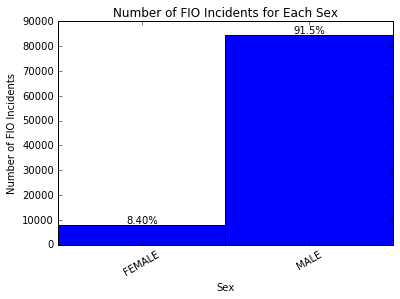

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [12770, 14119, 13770, 13804, 14446, 13503, 10086]


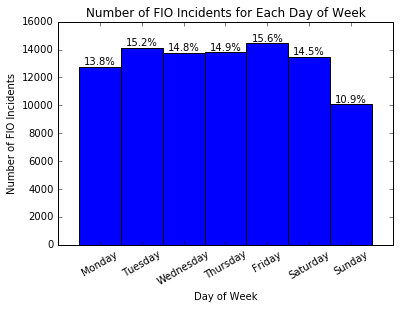


Plots for Cluster 1 from Kmeans++...

There are 1123 entries in this cluster.

Race:  ['A(Asian or Pacific Islander)', 'B(Black)', 'H(Hispanic)', 'M(Middle Eastern or East Indian)', 'W(White)']
Counts based on Race:  [162, 109, 214, 63, 126]


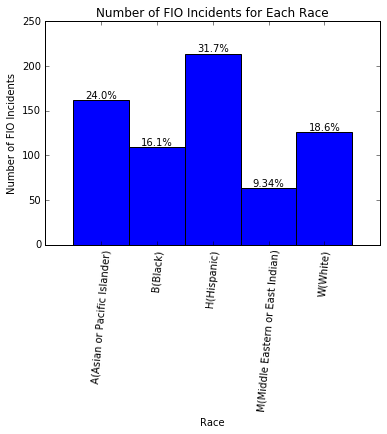

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [117, 62, 164, 50, 72, 151, 73, 25, 32, 37, 29]


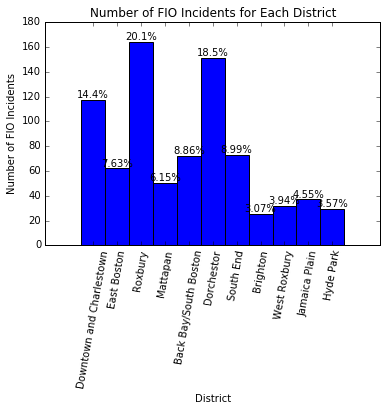

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [124, 118, 110, 178, 94, 40, 45]


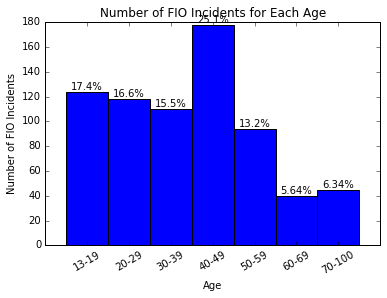

Sex:  ['FEMALE', 'MALE']
Counts based on Sex:  [367, 449]


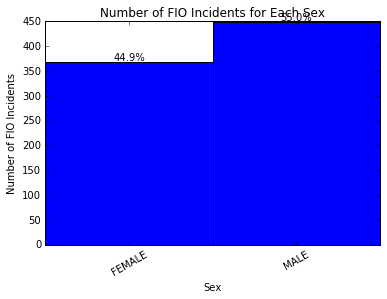

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [121, 129, 125, 109, 126, 113, 93]


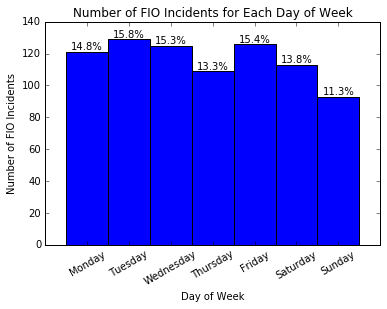


Plots for Cluster 2 from Kmeans++...

There are 29058 entries in this cluster.

Race:  ['A(Asian or Pacific Islander)', 'B(Black)', 'H(Hispanic)', 'M(Middle Eastern or East Indian)', 'W(White)']
Counts based on Race:  [405, 4348, 8048, 37, 5863]


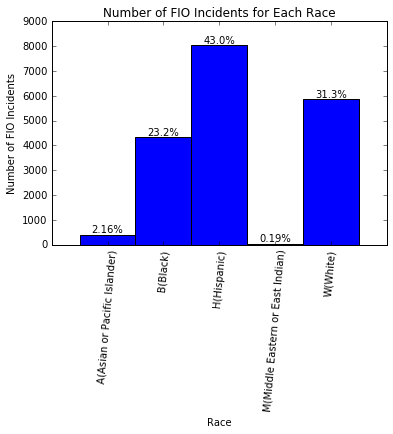

District:  ['A1 & A15', 'A7', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
Counts based on District:  [2807, 1514, 5198, 2625, 1934, 2777, 2341, 423, 749, 1128, 608]


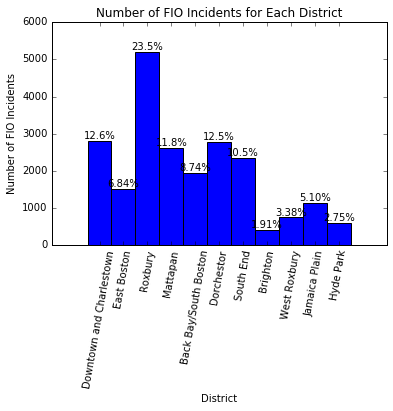

Age:  ['13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-100']
Counts based on Age:  [3501, 9089, 1192, 1732, 2874, 831, 0]


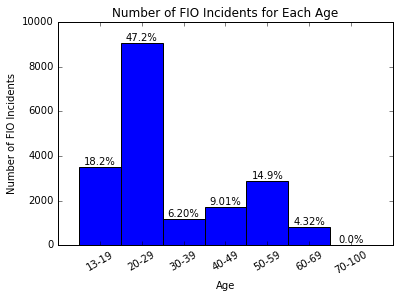

Sex:  ['FEMALE', 'MALE']
Counts based on Sex:  [5075, 17154]


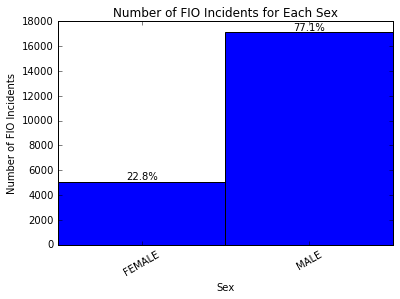

Day of Week:  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Counts based on Day of Week:  [3086, 3451, 3126, 3404, 3547, 3219, 2401]


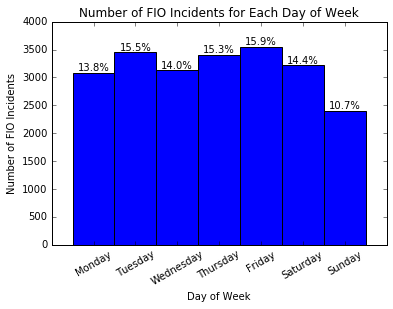

In [197]:
print("Kmeans++ cluster sizes: ")
print(sorted_kmeans)

#kmeans
kmeans_cluster_maximums = {}
for cluster, dataframe in kmeans_data:
    print("\nPlots for Cluster " + str(cluster) + " from Kmeans++...\n")
    print("There are " + str(len(dataframe)) + " entries in this cluster.\n")
    max_perc_race = plot_attribute(dataframe, "RACE_DESC", "Race", exclusion = "NO DATA ENTERED UNKNOWN", label_rotation = 85)
    max_perc_district = plot_attribute(dataframe, "DIST", "District", inclusion = "A1A15A7B2B3C6C11D4D14E5E13E18", reorder_func = order_districts, 
                       xlabels = district_names, label_rotation = 80, graph = "fio")
    max_perc_age = plot_attribute(dataframe, "AGE_AT_FIO_CORRECTED", "Age", inclusion = range(1, 101), reorder_func=bin_ages, graph = "fio")
    max_perc_sex = plot_attribute(dataframe, "SEX", "Sex", exclusion = "UNKNOWN", graph = "fio")
    max_perc_day = plot_attribute(dataframe, "DAY_OF_WEEK", "Day of Week", reorder_func = order_days, graph = "fio")
    kmeans_cluster_maximums[cluster] = [("size", len(dataframe)),max_perc_race, max_perc_district, max_perc_sex, max_perc_age, max_perc_day]
        

In [198]:
colors = 'bgrcmyk'
X = np.array(origin_df["LAT"])
Y = np.array(origin_df["LONG"])

dtype = [('cluster', int), ('size', int)]
filtered_dbscan = np.array(filtered_dbscan, dtype = dtype)
sorted_clusters = np.sort(filtered_dbscan, order = "size")
print(sorted_clusters)
#top 7 because I think there's only 7 colors in matplotlib to use
top7 = [cluster for cluster, size in sorted_clusters][-7:]
print(top7)

X = [X[i] for i in range(len(X)) if origin_df["dbscan_CLUSTER"].loc[i] in top7]
Y = [Y[i] for i in range(len(Y)) if origin_df["dbscan_CLUSTER"].loc[i] in top7]
                         

[(34, 359) (35, 379) (33, 482) (28, 565) (21, 573) (37, 586) (17, 632)
 (12, 732) (26, 876) (23, 952) (20, 1137) (32, 1137) (29, 1218) (31, 1359)
 (27, 1557) (9, 1787) (36, 2303) (18, 2385) (24, 2440) (10, 2598)
 (13, 3017) (15, 3343) (7, 3421) (0, 3746) (11, 3781) (5, 4349) (6, 6390)
 (8, 6802) (25, 8121) (1, 9346) (4, 12604) (2, 14586) (3, 42191)]
[6, 8, 25, 1, 4, 2, 3]


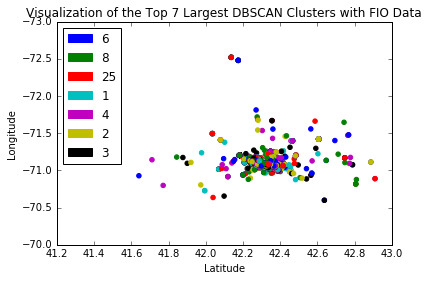

In [199]:
plt.scatter(X, Y, color=colors)
plt.title("Visualization of the Top 7 Largest DBSCAN Clusters with FIO Data")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
handles = [mpatches.Patch(color=color, label= cluster) for color, cluster in zip(colors, top7)]
plt.legend(loc = "upper left", handles=handles)
plt.xlim(41.2, 43)
plt.ylim(-70, -73)
plt.show()

In [200]:
print("DBSCAN Cluster information starting from the largest cluster to the smallest (with size > 300)...\n")
for cluster, size in sorted_clusters[::-1]:
    print("Cluster " + str(cluster) + ": ")
    print(dbscan_cluster_maximums[cluster])
    
top7_maximums = {}
for key in dbscan_cluster_maximums:
    if(key in top7):
        top7_maximums[key] = dbscan_cluster_maximums[key]


DBSCAN Cluster information starting from the largest cluster to the smallest (with size > 300)...

Cluster 3: 
[('size', 42191), (100.0, 'B(Black)'), (38.0741103393409, 'Roxbury'), (100.0, 'MALE'), (100.0, '20-29'), (15.658503898635479, 'Friday')]
Cluster 2: 
[('size', 14586), (100.0, 'B(Black)'), (32.17979700338328, 'Roxbury'), (100.0, 'MALE'), (100.0, '13-19'), (16.998748676484745, 'Friday')]
Cluster 4: 
[('size', 12604), (100.0, 'B(Black)'), (31.252537555826226, 'Roxbury'), (100.0, 'MALE'), (100.0, '30-39'), (15.691811214199275, 'Friday')]
Cluster 1: 
[('size', 9346), (100.0, 'W(White)'), (26.107942079859587, 'Downtown and Charlestown'), (100.0, 'MALE'), (100.0, '20-29'), (15.804053068960489, 'Saturday')]
Cluster 25: 
[('size', 8121), (100.0, 'H(Hispanic)'), (26.177437020810512, 'Roxbury'), (100.0, 'MALE'), (100.0, '20-29'), (16.471871591086177, 'Saturday')]
Cluster 8: 
[('size', 6802), (100.0, 'B(Black)'), (29.57237502509536, 'Roxbury'), (100.0, 'MALE'), (100.0, '40-49'), (16.65332

In [201]:
#kmeans isn't nearly as informative
for key in kmeans_cluster_maximums:
    print("Cluster " + str(key) + ": ")
    print(kmeans_cluster_maximums[key])
    

Cluster 0: 
[('size', 122049), (69.79077382914662, 'B(Black)'), (28.430999837071635, 'Roxbury'), (91.59356250135377, 'MALE'), (48.595910841151905, '20-29'), (15.61763497589137, 'Friday')]
Cluster 1: 
[('size', 1123), (31.750741839762615, 'H(Hispanic)'), (20.19704433497537, 'Roxbury'), (55.024509803921575, 'MALE'), (25.105782792665725, '40-49'), (15.808823529411764, 'Tuesday')]
Cluster 2: 
[('size', 29058), (43.03513181113309, 'H(Hispanic)'), (23.51610568222946, 'Roxbury'), (77.16946331368932, 'MALE'), (47.29174254643842, '20-29'), (15.953044886210307, 'Friday')]
